## Load dataset

Below you can see code used to load the dataset of 15 3D models. Each sample consists of a 1024x1024 or 2048x2048 texture, a 3D model as a .obj file, and a list of ground truth labels. Some models only have one label, while other have multiple ones.

In [2]:
import os
import random
import csv

In [3]:
class Model3D:
    def __init__(self, folder, data_dir):
        self.name = folder
        absolute_model_path = os.path.join(data_dir, self.name)

        self.texture_path = Model3D._get_texture_path(absolute_model_path)
        self.obj_path = os.path.join(absolute_model_path, "{}.obj".format(self.name))
        self.labels = Model3D._load_labels(absolute_model_path)

    def __str__(self):
        return "{}: labels {}, texture {}, obj {}".format(self.name, self.labels, self.texture_path, self.obj_path)

    @staticmethod
    def _get_texture_path(path):
        """Determines if texture is a jpg or png file, and returns absolute path to texture file.

        Parameters
        ----------
        path : String
            Absolute path to dataset sample folder.

        Returns
        -------
        String
            Absolute path to texture file.
        """
        if not os.path.isdir(path):
            raise ValueError("The given absolute path is not a directory!")

        for file in os.listdir(path):
            if file.endswith(".jpg"):
                return os.path.join(path, file)
            elif file.endswith(".png"):
                return os.path.join(path, file)

        raise ValueError("No jpg or png files found in the given directory!")

    @staticmethod
    def _load_labels(path):
        """Reads labels of a certain sample from the dataset and returns them.

        Parameters
        ----------
        path : String
            Absolute path to dataset sample folder.

        Returns
        -------
        String or list
            Returns a list of integers, or if this is the dog model, just returns "dog" as a label.
        """
        if not os.path.isdir(path):
            raise ValueError("The given absolute path is not a directory!")

        labels_file_path = os.path.join(path, "labels.txt")
        try:
            labels_file = open(labels_file_path)
        except FileNotFoundError:
            raise FileNotFoundError("No txt files found in the given path! Can not find labels!")

        # labels are written only on the first line of the file, we only read the first line
        labels = next(csv.reader(labels_file, delimiter=','))
        # German shepherd model has all 120+ dog labels as true labels, that is encoded only as "dog" to save
        # make things easier
        if labels[0] == 'dog':
            return labels[0]
        else:
            try:
                int_labels = [int(label) for label in labels]
                return int_labels
            except ValueError as e:
                print("Original exception message: {}".format(str(e)))
                raise ValueError("A label of {} does not represent an int!".format(path))
            finally:
                labels_file.close()


def get_object_folders(data_dir):
    """Returns a list of all folders in the given folder.

    Parameters
    ----------
    path : String
        Absolute path to dataset sample folder.

    Returns
    -------
    List of strings
        Returns a list of with the name of each folder.
    """
    if not os.path.isdir(data_dir):
        raise ValueError("The given data path is not a directory!")

    return [folder for folder in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, folder))]


def load_dataset(data_dir):
    object_folders = get_object_folders(data_dir)
    models = [Model3D(folder, data_dir) for folder in object_folders]
    for model in models:
        print(str(model))

    return models

Define code to generate random target labels, different than the true labels of the model.

In [4]:
def get_random_target_label(ground_truth_labels):
    label_set = set(ground_truth_labels)

    # loop until we have a random target label distinct from the true labels
    while True:
        target_label = random.randint(0, 999)

        # dog model has al 120+ dog breeds as true labels, so we need to check if the label is outside that range
        if ground_truth_labels == "dog":
            if target_label < 151 or target_label > 275:
                return target_label
        # just check that the chosen target is not in the set of true labels
        elif target_label not in label_set:
            return target_label

In [5]:
import config

barrel: labels [427], texture ./dataset\barrel\barrel.jpg, obj ./dataset\barrel\barrel.obj
baseball: labels [429], texture ./dataset\baseball\baseball.png, obj ./dataset\baseball\baseball.obj
camaro: labels [817, 436, 751], texture ./dataset\camaro\camaro.png, obj ./dataset\camaro\camaro.obj
clownfish: labels [393], texture ./dataset\clownfish\clownfish.jpg, obj ./dataset\clownfish\clownfish.obj
crocodile: labels [49, 50], texture ./dataset\crocodile\crocodile.jpg, obj ./dataset\crocodile\crocodile.obj
german_shepherd: labels dog, texture ./dataset\german_shepherd\german_shepherd.png, obj ./dataset\german_shepherd\german_shepherd.obj
jeep: labels [609, 586, 408], texture ./dataset\jeep\jeep.png, obj ./dataset\jeep\jeep.obj
orange: labels [950], texture ./dataset\orange\orange.jpg, obj ./dataset\orange\orange.obj
orca: labels [148], texture ./dataset\orca\orca.png, obj ./dataset\orca\orca.obj
purse: labels [748, 893], texture ./dataset\purse\purse.png, obj ./dataset\purse\purse.obj
rugb

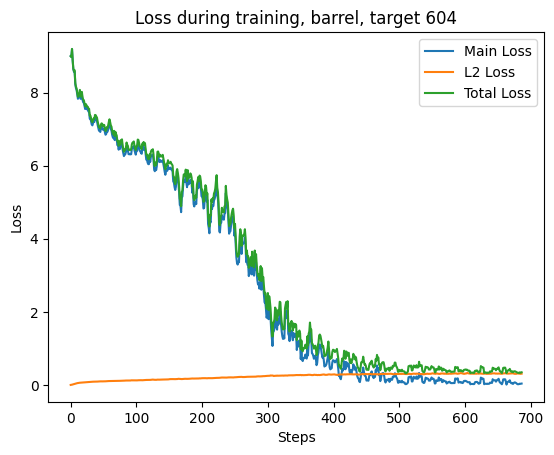

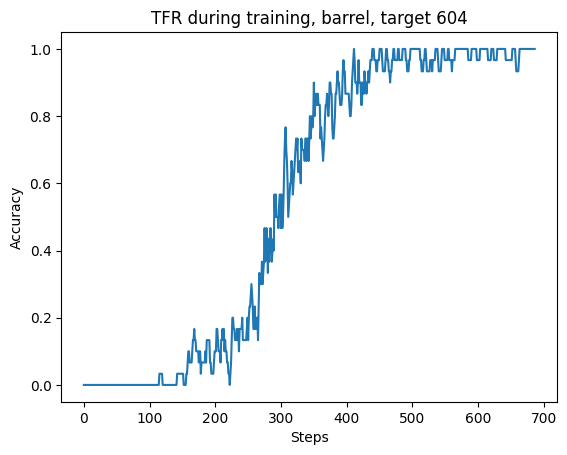

Target label 748
New renders for each step: 6
Step: 0
Loss: 9.081684112548828
Diff: 12.530574798583984
Step: 200
Loss: 0.5846341252326965
Diff: 208.8277130126953
Step: 400
Loss: 0.2052450031042099
Diff: 338.7395324707031
Early Stopping, average loss over past 400 steps is 0.4985331965982914


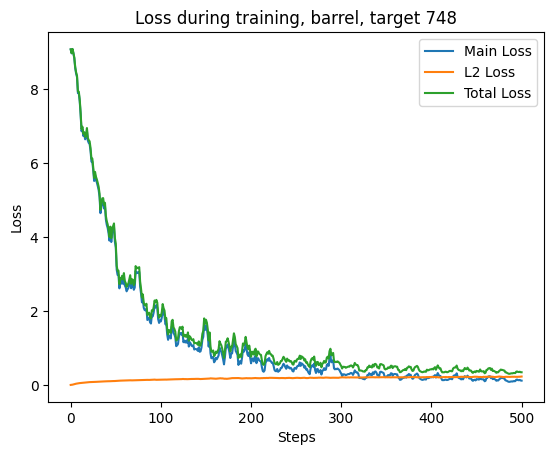

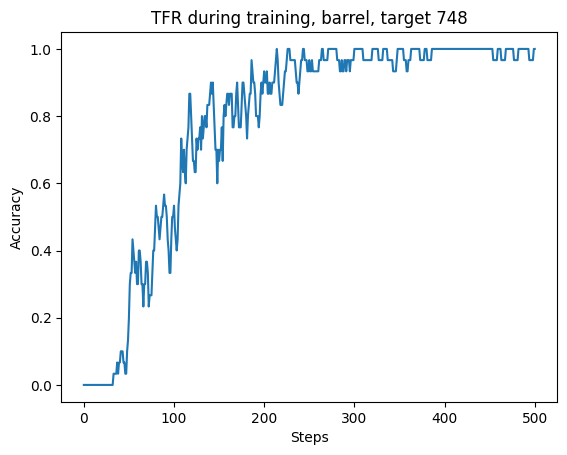

Target label 878
New renders for each step: 6
Step: 0
Loss: 10.022939682006836
Diff: 2.4835383892059326
Step: 200
Loss: 5.72084379196167
Diff: 219.99085998535156
Step: 400
Loss: 4.098848342895508
Diff: 563.4260864257812
Step: 600
Loss: 4.070209980010986
Diff: 803.6061401367188
Step: 800
Loss: 3.8698737621307373
Diff: 1116.0003662109375
Step: 1000
Loss: 2.883988380432129
Diff: 1382.3946533203125
Step: 1200
Loss: 3.0356333255767822
Diff: 1406.802734375
Step: 1400
Loss: 1.9100061655044556
Diff: 1555.2369384765625
Step: 1600
Loss: 2.251157283782959
Diff: 1582.2490234375
Step: 1800
Loss: 1.7864552736282349
Diff: 1717.240478515625
Step: 2000
Loss: 1.7746046781539917
Diff: 1732.980224609375
Step: 2200
Loss: 1.488881230354309
Diff: 1742.78173828125
Step: 2400
Loss: 1.124740719795227
Diff: 1597.9215087890625
Step: 2600
Loss: 1.1600091457366943
Diff: 1550.9185791015625
Step: 2800
Loss: 1.365739107131958
Diff: 1453.2716064453125
Step: 3000
Loss: 0.544760525226593
Diff: 1322.4215087890625
Step: 32

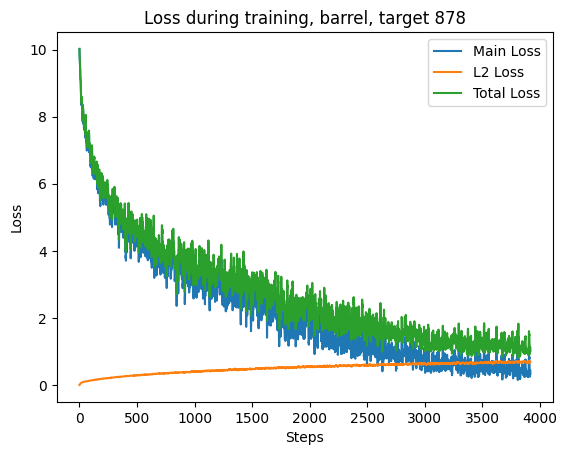

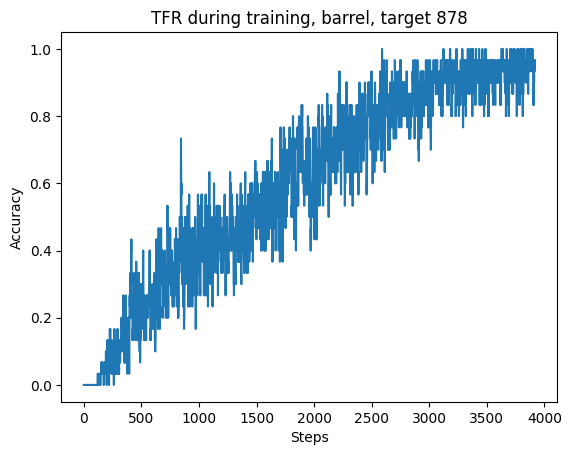

Target label 553
New renders for each step: 6
Step: 0
Loss: 10.052412986755371
Diff: -0.5086387991905212
Step: 200
Loss: 6.060267925262451
Diff: 209.3502197265625
Step: 400
Loss: 2.9557583332061768
Diff: 237.95730590820312
Step: 600
Loss: 0.7520253658294678
Diff: 219.01528930664062
Step: 800
Loss: 0.23892657458782196
Diff: 66.02995300292969
Early Stopping, average loss over past 400 steps is 0.4997937786579132


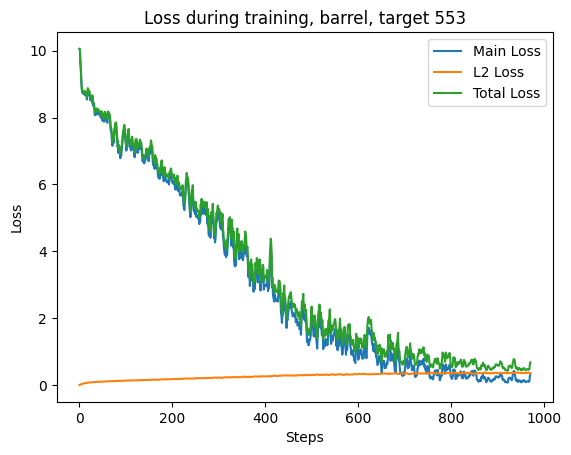

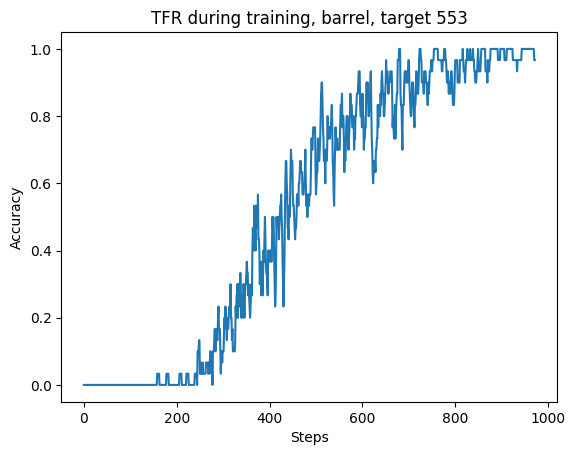

Target label 683
New renders for each step: 6
Step: 0
Loss: 9.218118667602539
Diff: 12.520796775817871
Step: 200
Loss: 5.201679706573486
Diff: -78.17194366455078
Step: 400
Loss: 2.1805737018585205
Diff: -143.7727813720703
Step: 600
Loss: 1.2020198106765747
Diff: 126.58776092529297
Step: 800
Loss: 0.4937438368797302
Diff: 229.53292846679688
Step: 1000
Loss: 0.5179715752601624
Diff: 333.59521484375
Early Stopping, average loss over past 400 steps is 0.49981268268078566


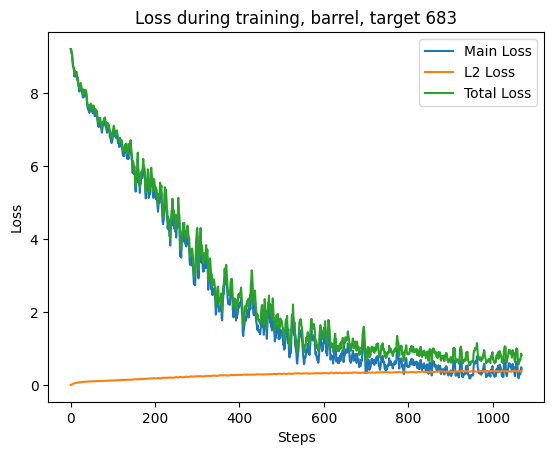

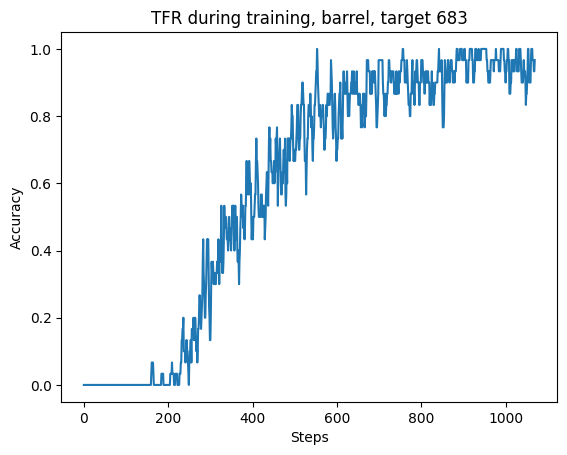

Creating adversarial examples for model baseball
Target label 753
New renders for each step: 6
Step: 0
Loss: 12.849516868591309
Diff: 21.76921844482422
Step: 200
Loss: 7.750138759613037
Diff: 1126.9840087890625
Step: 400
Loss: 6.887881278991699
Diff: 1022.2244262695312
Step: 600
Loss: 5.386686325073242
Diff: 693.1531982421875
Step: 800
Loss: 4.761845588684082
Diff: 84.88551330566406
Step: 1000
Loss: 3.7553224563598633
Diff: -458.77923583984375
Step: 1200
Loss: 2.6520462036132812
Diff: -929.9368286132812
Step: 1400
Loss: 2.786088228225708
Diff: -1225.980712890625
Step: 1600
Loss: 2.5804214477539062
Diff: -1447.43505859375
Step: 1800
Loss: 1.3156605958938599
Diff: -1830.412841796875
Step: 2000
Loss: 1.6642407178878784
Diff: -2356.10009765625
Step: 2200
Loss: 0.59865802526474
Diff: -2949.1962890625
Step: 2400
Loss: 0.5769680142402649
Diff: -3598.084716796875
Early Stopping, average loss over past 400 steps is 0.4991933088563383


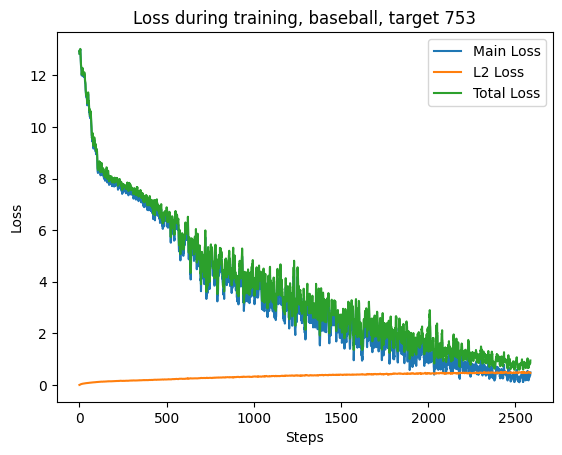

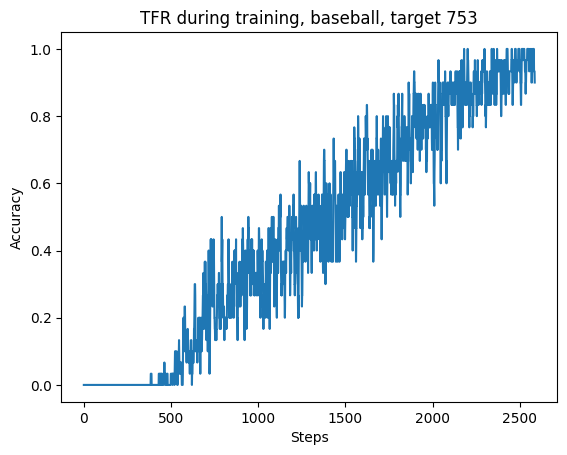

Target label 895
New renders for each step: 6
Step: 0
Loss: 13.9491605758667
Diff: 14.248320579528809
Step: 200
Loss: 6.492835998535156
Diff: 1022.201904296875
Step: 400
Loss: 5.2718119621276855
Diff: 329.5236511230469
Step: 600
Loss: 4.477900981903076
Diff: -632.1047973632812
Step: 800
Loss: 4.2916646003723145
Diff: -1652.4776611328125
Step: 1000
Loss: 3.6344552040100098
Diff: -2403.49365234375
Step: 1200
Loss: 2.761441469192505
Diff: -2874.392333984375
Step: 1400
Loss: 2.24385929107666
Diff: -3169.331787109375
Step: 1600
Loss: 1.7969752550125122
Diff: -3450.875
Step: 1800
Loss: 1.8873811960220337
Diff: -3760.650390625
Step: 2000
Loss: 1.4754475355148315
Diff: -4089.116943359375
Step: 2200
Loss: 1.8919116258621216
Diff: -4402.9775390625
Step: 2400
Loss: 1.175754427909851
Diff: -4802.5615234375
Step: 2600
Loss: 1.3633453845977783
Diff: -5132.123046875
Step: 2800
Loss: 0.9841124415397644
Diff: -5653.7861328125
Step: 3000
Loss: 0.7939987182617188
Diff: -6215.09130859375
Step: 3200
Loss: 

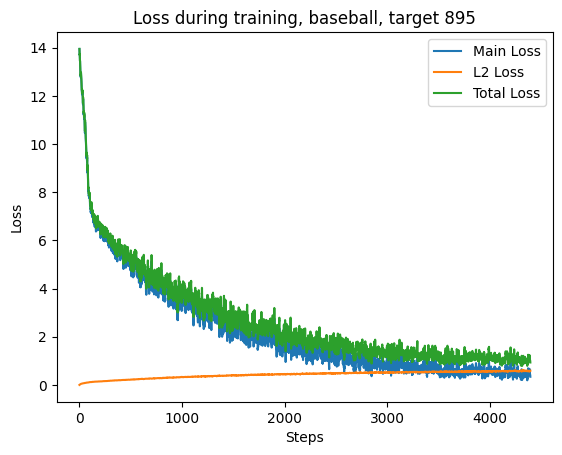

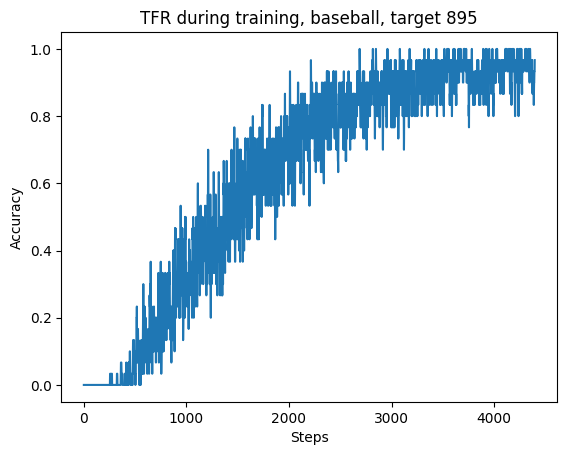

Target label 273
New renders for each step: 6
Step: 0
Loss: 13.564697265625
Diff: 17.0360164642334
Step: 200
Loss: 8.033903121948242
Diff: 1246.4012451171875
Step: 400
Loss: 7.4469451904296875
Diff: 1473.9912109375
Step: 600
Loss: 6.870142459869385
Diff: 1637.0772705078125
Step: 800
Loss: 6.389771461486816
Diff: 1919.6053466796875
Step: 1000
Loss: 6.0200114250183105
Diff: 2293.344482421875
Step: 1200
Loss: 5.629392623901367
Diff: 2859.8193359375
Step: 1400
Loss: 5.540966510772705
Diff: 3520.48974609375
Step: 1600
Loss: 5.426713943481445
Diff: 4211.63623046875
Step: 1800
Loss: 5.467336177825928
Diff: 4818.60400390625
Step: 2000
Loss: 4.953365802764893
Diff: 5386.75927734375
Step: 2200
Loss: 4.98940896987915
Diff: 5840.36572265625
Step: 2400
Loss: 4.631166458129883
Diff: 6262.13818359375
Step: 2600
Loss: 4.5192718505859375
Diff: 6493.021484375
Step: 2800
Loss: 4.303709983825684
Diff: 6605.65234375
Step: 3000
Loss: 4.3596510887146
Diff: 6493.400390625
Step: 3200
Loss: 4.524198532104492
Di

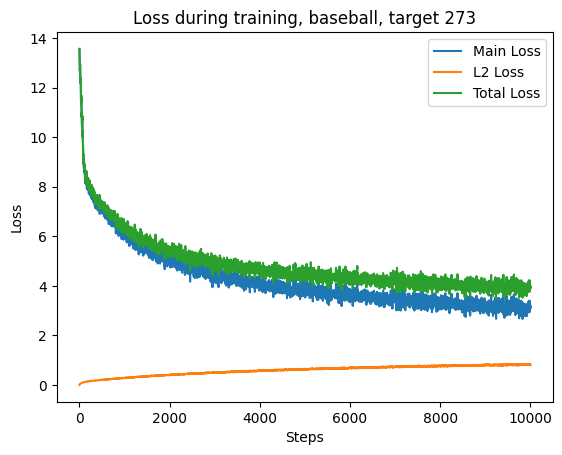

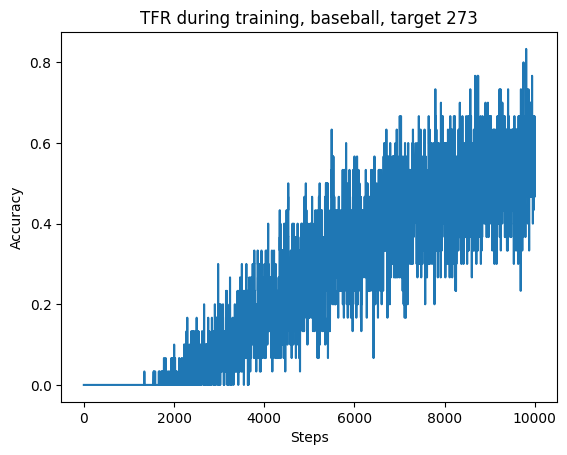

Target label 193
New renders for each step: 6
Step: 0
Loss: 13.592597007751465
Diff: 4.141461372375488
Step: 200
Loss: 7.311692237854004
Diff: 1321.8936767578125
Step: 400
Loss: 6.254265308380127
Diff: 1783.984375
Step: 600
Loss: 5.956544876098633
Diff: 2079.35595703125
Step: 800
Loss: 5.117520809173584
Diff: 2309.497802734375
Step: 1000
Loss: 4.86746072769165
Diff: 2528.110107421875
Step: 1200
Loss: 4.69863224029541
Diff: 2696.337646484375
Step: 1400
Loss: 4.423826217651367
Diff: 2856.250244140625
Step: 1600
Loss: 3.880584716796875
Diff: 2791.24658203125
Step: 1800
Loss: 4.255514144897461
Diff: 2486.256103515625
Step: 2000
Loss: 3.7434637546539307
Diff: 2050.074951171875
Step: 2200
Loss: 3.667046546936035
Diff: 1498.6630859375
Step: 2400
Loss: 3.5421016216278076
Diff: 823.9575805664062
Step: 2600
Loss: 3.5452301502227783
Diff: -90.2403793334961
Step: 2800
Loss: 3.3294146060943604
Diff: -1177.6793212890625
Step: 3000
Loss: 3.4182932376861572
Diff: -2433.810302734375
Step: 3200
Loss: 3.

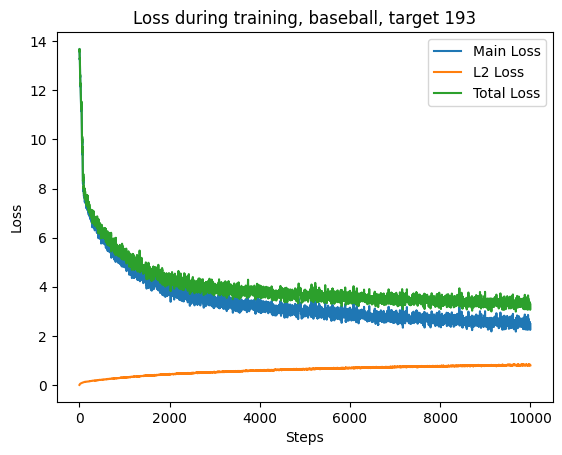

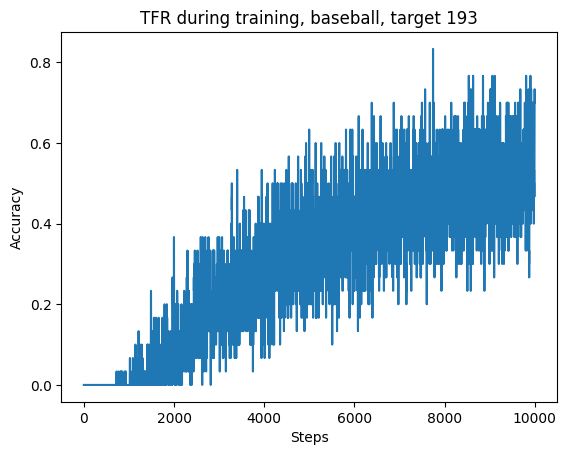

Target label 385
New renders for each step: 6
Step: 0
Loss: 14.123866081237793
Diff: 27.682870864868164
Step: 200
Loss: 7.191283226013184
Diff: 1388.2032470703125
Step: 400
Loss: 6.406310081481934
Diff: 1575.270751953125
Step: 600
Loss: 4.928443908691406
Diff: 1658.8135986328125
Step: 800
Loss: 4.666628360748291
Diff: 1578.7584228515625
Step: 1000
Loss: 4.231971740722656
Diff: 1489.2889404296875
Step: 1200
Loss: 4.199405670166016
Diff: 1243.5469970703125
Step: 1400
Loss: 3.168708562850952
Diff: 948.91552734375
Step: 1600
Loss: 3.7549490928649902
Diff: 689.8900146484375
Step: 1800
Loss: 2.660325050354004
Diff: 294.652099609375
Step: 2000
Loss: 2.5349090099334717
Diff: -41.46023178100586
Step: 2200
Loss: 1.701390027999878
Diff: -516.0183715820312
Step: 2400
Loss: 1.1065754890441895
Diff: -1306.87646484375
Step: 2600
Loss: 1.331208348274231
Diff: -2055.74169921875
Step: 2800
Loss: 1.3404535055160522
Diff: -2907.458251953125
Step: 3000
Loss: 1.3109562397003174
Diff: -3840.470947265625
Step

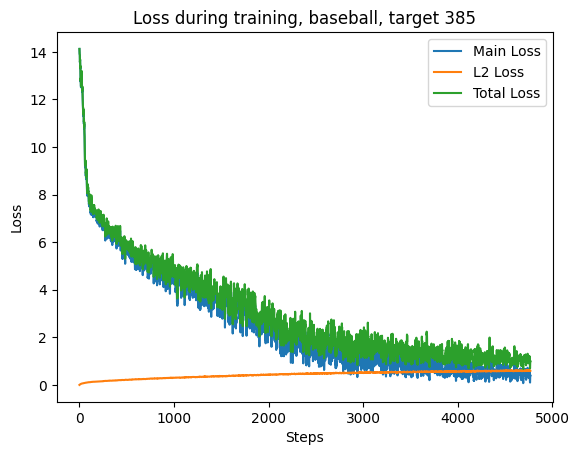

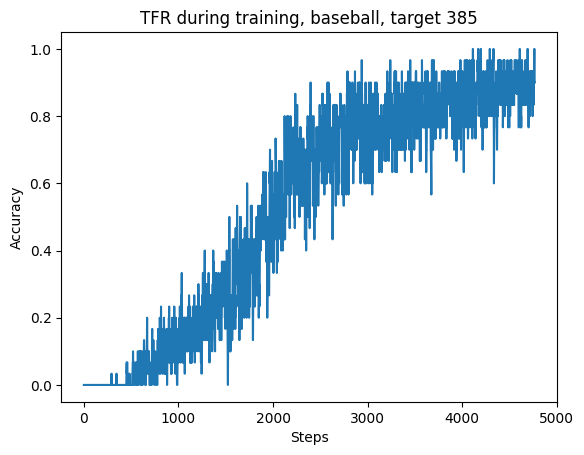

Creating adversarial examples for model camaro
Target label 298
New renders for each step: 8
Step: 0
Loss: 8.69134521484375
Diff: -5.784178256988525
Step: 200
Loss: 7.175755977630615
Diff: 2537.2529296875
Step: 400
Loss: 6.483157157897949
Diff: 5948.1748046875
Step: 600
Loss: 4.830535888671875
Diff: 9405.79296875
Step: 800
Loss: 4.167695045471191
Diff: 12315.6708984375
Step: 1000
Loss: 3.4241840839385986
Diff: 15154.4638671875
Step: 1200
Loss: 3.677382707595825
Diff: 18049.525390625
Step: 1400
Loss: 2.5983879566192627
Diff: 20742.2734375
Step: 1600
Loss: 2.036634922027588
Diff: 23287.66015625
Step: 1800
Loss: 1.7184292078018188
Diff: 25681.8671875
Step: 2000
Loss: 1.0493203401565552
Diff: 27738.4375
Step: 2200
Loss: 1.0285613536834717
Diff: 29289.51953125
Step: 2400
Loss: 0.8994730114936829
Diff: 30466.314453125
Step: 2600
Loss: 0.913742184638977
Diff: 31688.130859375
Step: 2800
Loss: 0.3804044723510742
Diff: 32682.08203125
Early Stopping, average loss over past 400 steps is 0.49941826

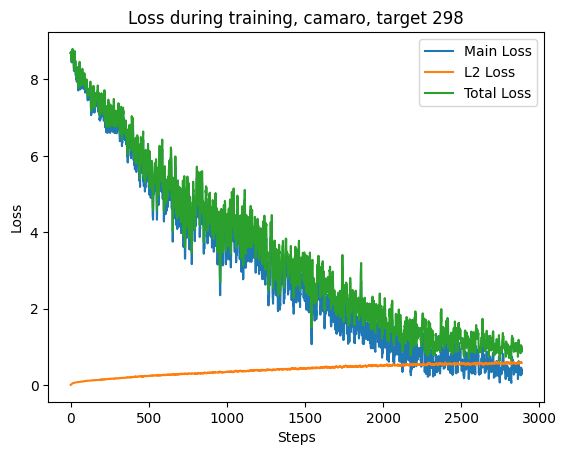

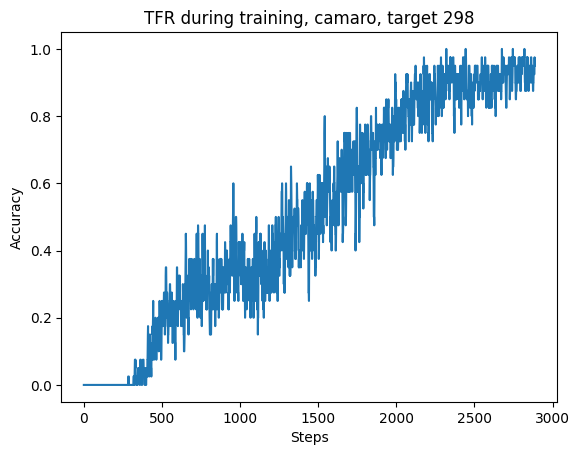

Target label 875
New renders for each step: 8
Step: 0
Loss: 9.67647647857666
Diff: -7.61262321472168
Step: 200
Loss: 7.023076057434082
Diff: 2385.598388671875
Step: 400
Loss: 3.1088414192199707
Diff: 6233.197265625
Step: 600
Loss: 2.056990623474121
Diff: 9312.5693359375
Step: 800
Loss: 1.925571084022522
Diff: 11511.64453125
Step: 1000
Loss: 1.558929443359375
Diff: 13388.8603515625
Step: 1200
Loss: 1.256274938583374
Diff: 15251.8671875
Step: 1400
Loss: 0.47853246331214905
Diff: 16795.1796875
Step: 1600
Loss: 1.0397484302520752
Diff: 18146.9453125
Step: 1800
Loss: 0.38259464502334595
Diff: 19472.681640625
Step: 2000
Loss: 0.44407519698143005
Diff: 20681.466796875
Early Stopping, average loss over past 400 steps is 0.49904143771156667


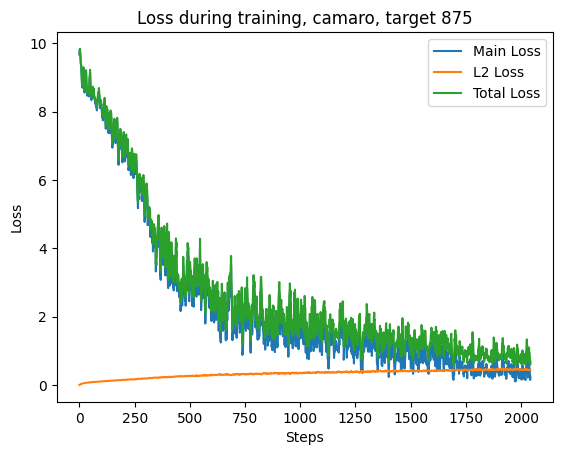

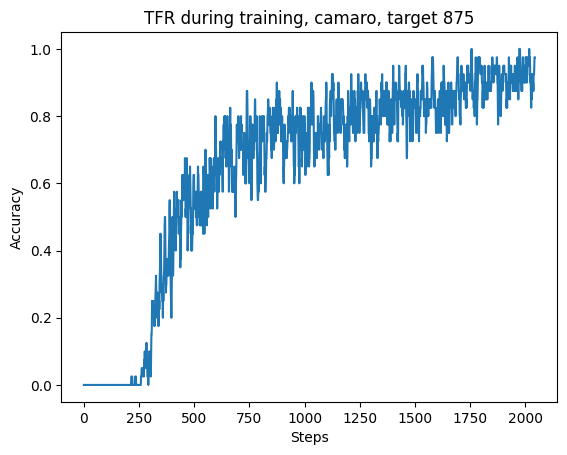

Target label 384
New renders for each step: 8
Step: 0
Loss: 9.283753395080566
Diff: -1.9253782033920288
Step: 200
Loss: 7.4892683029174805
Diff: 2609.09130859375
Step: 400
Loss: 5.066381931304932
Diff: 6500.55859375
Step: 600
Loss: 2.7733988761901855
Diff: 10511.4267578125
Step: 800
Loss: 3.152987003326416
Diff: 12730.72265625
Step: 1000
Loss: 1.4688050746917725
Diff: 14500.3212890625
Step: 1200
Loss: 1.2571154832839966
Diff: 16417.080078125
Step: 1400
Loss: 0.5619931221008301
Diff: 18024.44140625
Step: 1600
Loss: 0.28830379247665405
Diff: 19135.373046875
Step: 1800
Loss: 0.346605122089386
Diff: 20051.71875
Early Stopping, average loss over past 400 steps is 0.49968063737265767


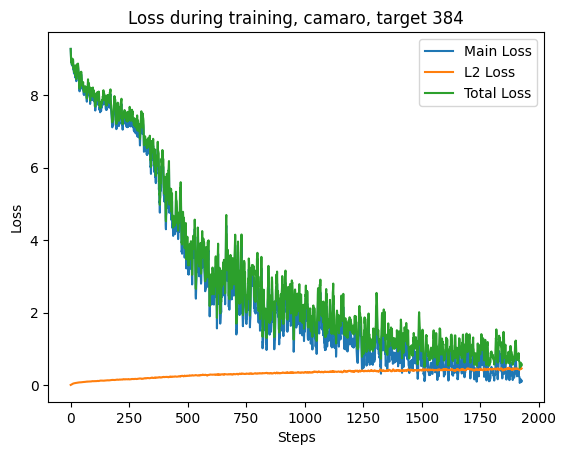

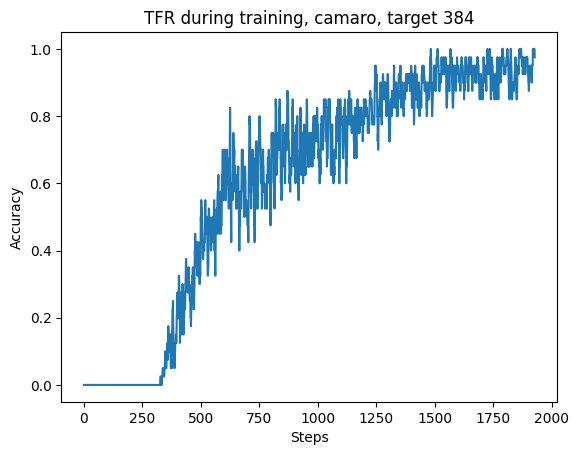

Target label 21
New renders for each step: 8
Step: 0
Loss: 8.325281143188477
Diff: -21.19340705871582
Step: 200
Loss: 3.9377732276916504
Diff: 2391.69921875
Step: 400
Loss: 2.1345489025115967
Diff: 5070.966796875
Step: 600
Loss: 2.1585123538970947
Diff: 7698.43359375
Step: 800
Loss: 0.8049119710922241
Diff: 9698.2802734375
Step: 1000
Loss: 0.39760565757751465
Diff: 11223.044921875
Step: 1200
Loss: 0.34675097465515137
Diff: 12577.03515625
Early Stopping, average loss over past 400 steps is 0.49956672243773936


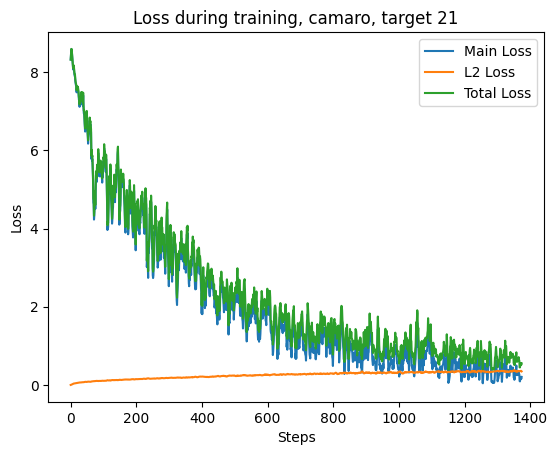

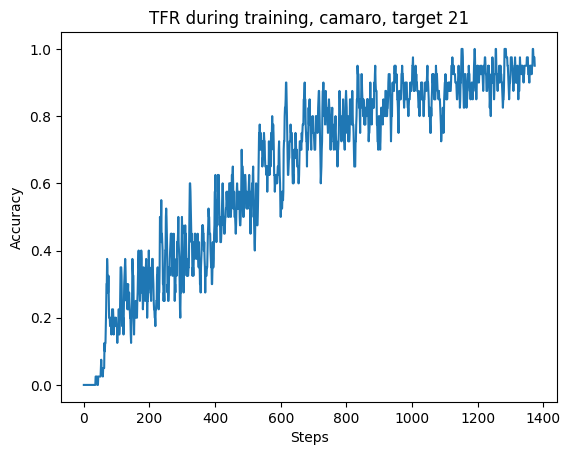

Target label 98
New renders for each step: 8
Step: 0
Loss: 9.441848754882812
Diff: -12.347783088684082
Step: 200
Loss: 8.096238136291504
Diff: 2310.742431640625
Step: 400
Loss: 7.181475639343262
Diff: 5162.95263671875
Step: 600
Loss: 7.177286624908447
Diff: 8180.95751953125
Step: 800
Loss: 6.4265851974487305
Diff: 11541.7607421875
Step: 1000
Loss: 5.799580097198486
Diff: 15048.5634765625
Step: 1200
Loss: 4.099490642547607
Diff: 18817.572265625
Step: 1400
Loss: 4.13821268081665
Diff: 22698.728515625
Step: 1600
Loss: 2.7958786487579346
Diff: 26171.515625
Step: 1800
Loss: 2.7594547271728516
Diff: 29068.626953125
Step: 2000
Loss: 2.104665517807007
Diff: 31636.5859375
Step: 2200
Loss: 2.0958895683288574
Diff: 34122.31640625
Step: 2400
Loss: 1.2373027801513672
Diff: 36099.453125
Step: 2600
Loss: 1.0673341751098633
Diff: 37939.0234375
Step: 2800
Loss: 1.0168859958648682
Diff: 39544.41796875
Step: 3000
Loss: 0.9172664880752563
Diff: 41048.32421875
Step: 3200
Loss: 1.2689186334609985
Diff: 4233

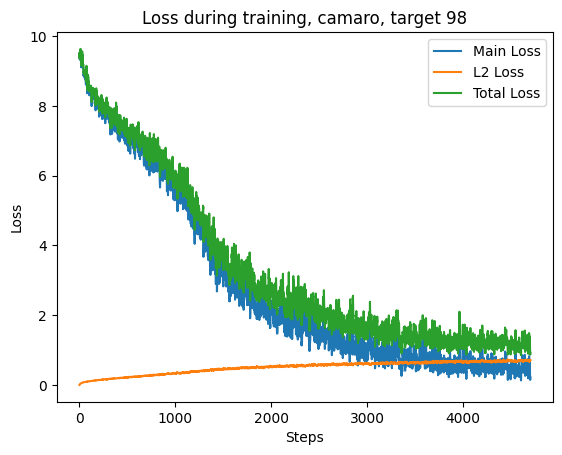

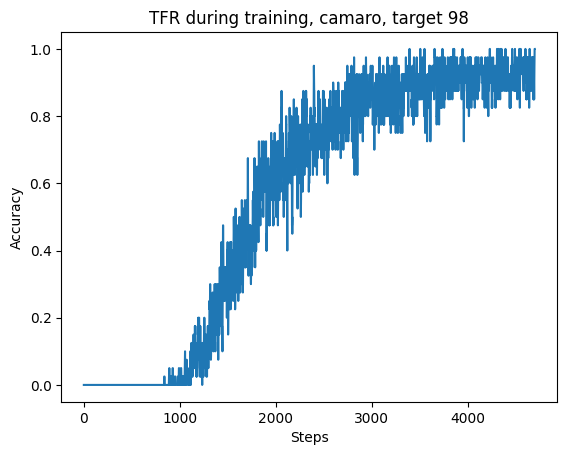

Creating adversarial examples for model clownfish
Target label 892
New renders for each step: 6
Step: 0
Loss: 7.989381790161133
Diff: 11.1929292678833
Step: 200
Loss: 7.177283763885498
Diff: 2234.398193359375
Step: 400
Loss: 7.153255939483643
Diff: 9449.2958984375
Step: 600
Loss: 7.125163555145264
Diff: 19182.875
Step: 800
Loss: 6.936761379241943
Diff: 28979.453125
Step: 1000
Loss: 6.545625686645508
Diff: 39510.5234375
Step: 1200
Loss: 6.464181423187256
Diff: 49740.62109375
Step: 1400
Loss: 6.7279863357543945
Diff: 60366.16796875
Step: 1600
Loss: 6.397170066833496
Diff: 70654.265625
Step: 1800
Loss: 6.155462741851807
Diff: 80763.34375
Step: 2000
Loss: 6.852527141571045
Diff: 91086.3671875
Step: 2200
Loss: 6.263394355773926
Diff: 101144.1953125
Step: 2400
Loss: 5.9211273193359375
Diff: 110735.3984375
Step: 2600
Loss: 5.934074401855469
Diff: 120332.7890625
Step: 2800
Loss: 5.7903900146484375
Diff: 129703.2734375
Step: 3000
Loss: 5.226408958435059
Diff: 138450.15625
Step: 3200
Loss: 5.960

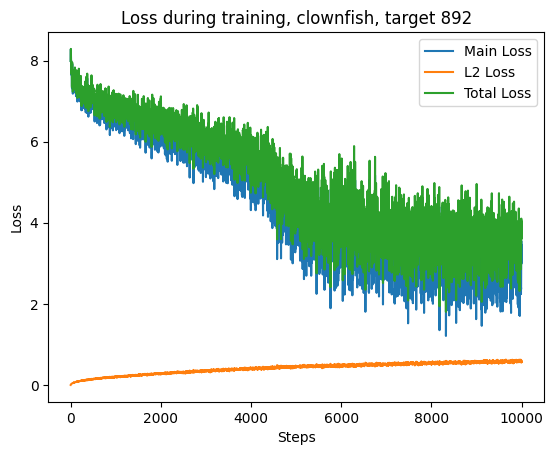

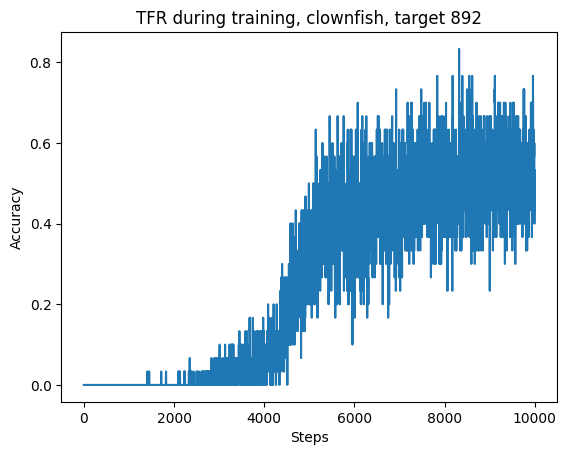

Target label 579
New renders for each step: 6
Step: 0
Loss: 8.313891410827637
Diff: 9.003665924072266
Step: 200
Loss: 8.283685684204102
Diff: 2396.409912109375
Step: 400
Loss: 8.012224197387695
Diff: 9472.9619140625
Step: 600
Loss: 7.711899280548096
Diff: 18842.8984375
Step: 800
Loss: 7.595561504364014
Diff: 29118.50390625
Step: 1000
Loss: 7.242559909820557
Diff: 39347.47265625
Step: 1200
Loss: 7.45230770111084
Diff: 49713.70703125
Step: 1400
Loss: 7.075692653656006
Diff: 60252.06640625
Step: 1600
Loss: 7.138984203338623
Diff: 70198.390625
Step: 1800
Loss: 7.3787102699279785
Diff: 79718.8828125
Step: 2000
Loss: 7.133059978485107
Diff: 88863.859375
Step: 2200
Loss: 7.288481712341309
Diff: 98157.015625
Step: 2400
Loss: 6.907027244567871
Diff: 107206.8359375
Step: 2600
Loss: 6.874063968658447
Diff: 115711.9609375
Step: 2800
Loss: 6.673279762268066
Diff: 123935.2578125
Step: 3000
Loss: 7.216740131378174
Diff: 132253.078125
Step: 3200
Loss: 7.0696258544921875
Diff: 140242.75
Step: 3400
Loss

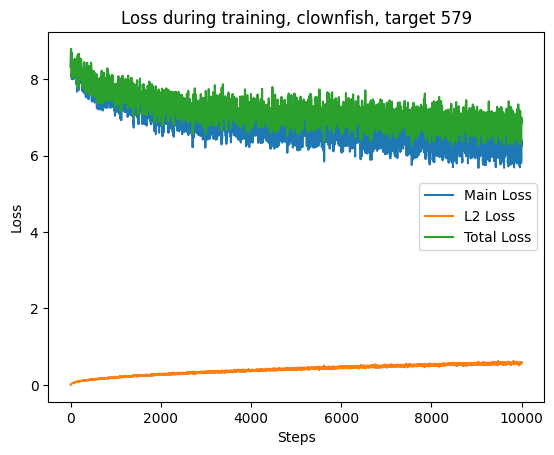

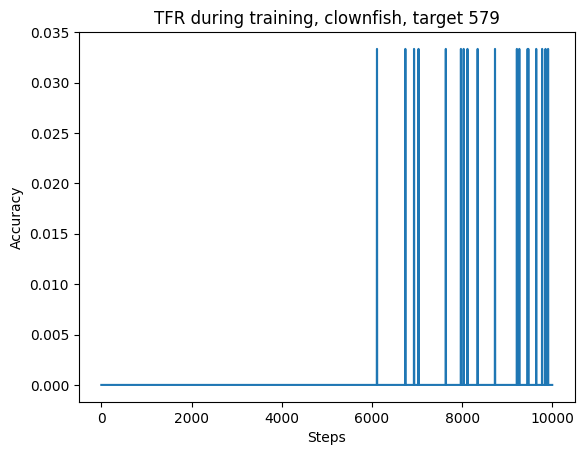

Target label 433
New renders for each step: 6
Step: 0
Loss: 6.902245998382568
Diff: 1.583349585533142
Step: 200
Loss: 6.057265281677246
Diff: 2140.2919921875
Step: 400
Loss: 5.840174674987793
Diff: 10476.5234375
Step: 600
Loss: 4.814882278442383
Diff: 21211.65234375
Step: 800
Loss: 4.385427474975586
Diff: 32602.390625
Step: 1000
Loss: 4.0440144538879395
Diff: 44311.17578125
Step: 1200
Loss: 3.7642531394958496
Diff: 56211.6015625
Step: 1400
Loss: 3.993316650390625
Diff: 67741.4453125
Step: 1600
Loss: 3.413177728652954
Diff: 79116.859375
Step: 1800
Loss: 3.1412878036499023
Diff: 89888.7109375
Step: 2000
Loss: 3.3535046577453613
Diff: 100831.765625
Step: 2200
Loss: 3.564718008041382
Diff: 111522.8984375
Step: 2400
Loss: 3.147636890411377
Diff: 121645.0703125
Step: 2600
Loss: 3.620673179626465
Diff: 131551.09375
Step: 2800
Loss: 3.368690013885498
Diff: 140997.96875
Step: 3000
Loss: 3.107045888900757
Diff: 150168.734375
Step: 3200
Loss: 2.639540910720825
Diff: 159080.484375
Step: 3400
Loss:

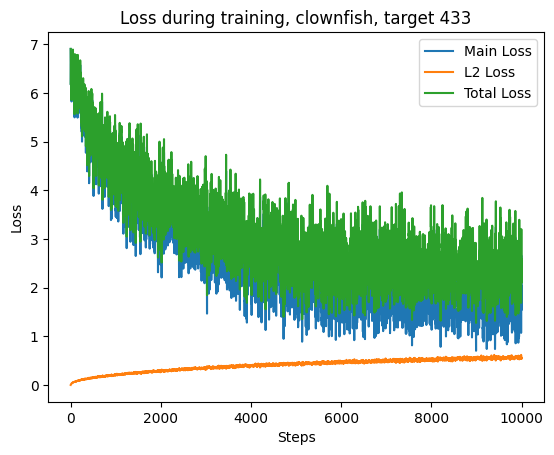

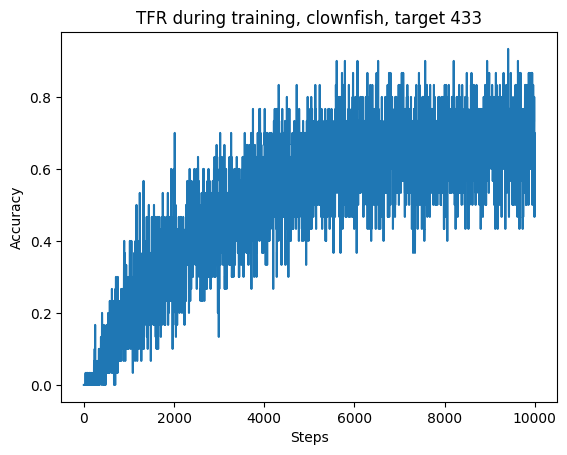

Target label 982
New renders for each step: 6
Step: 0
Loss: 9.179791450500488
Diff: -1.4486241340637207
Step: 200
Loss: 8.624753952026367
Diff: 1642.5001220703125
Step: 400
Loss: 7.9884033203125
Diff: 8661.7626953125
Step: 600
Loss: 7.880862236022949
Diff: 17916.9765625
Step: 800
Loss: 7.404113292694092
Diff: 28312.19140625
Step: 1000
Loss: 7.028976917266846
Diff: 38850.3984375
Step: 1200
Loss: 7.202857494354248
Diff: 49450.4296875
Step: 1400
Loss: 7.38511848449707
Diff: 60424.37890625
Step: 1600
Loss: 6.698658466339111
Diff: 71495.2265625
Step: 1800
Loss: 6.20958137512207
Diff: 82479.1484375
Step: 2000
Loss: 6.6022467613220215
Diff: 92617.234375
Step: 2200
Loss: 6.655900955200195
Diff: 102725.421875
Step: 2400
Loss: 6.132739067077637
Diff: 112660.875
Step: 2600
Loss: 5.95966100692749
Diff: 122767.5625
Step: 2800
Loss: 5.888025760650635
Diff: 132293.28125
Step: 3000
Loss: 5.348994731903076
Diff: 141557.546875
Step: 3200
Loss: 5.415277004241943
Diff: 150337.609375
Step: 3400
Loss: 5.760

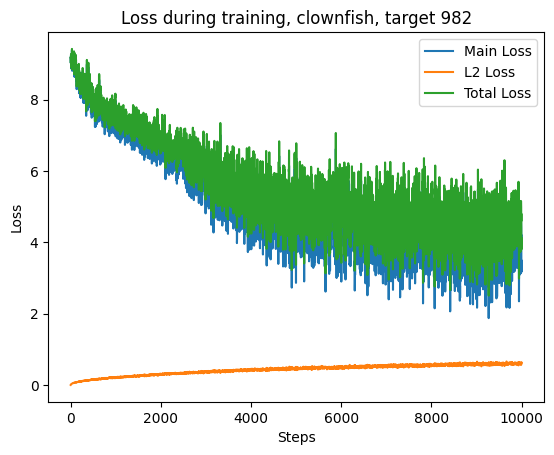

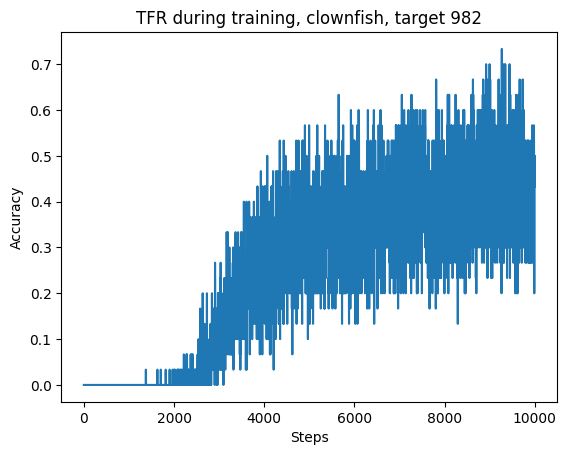

Target label 974
New renders for each step: 6
Step: 0
Loss: 7.901314735412598
Diff: 16.434364318847656
Step: 200
Loss: 7.991246223449707
Diff: 3131.928466796875
Step: 400
Loss: 7.817591190338135
Diff: 11639.5439453125
Step: 600
Loss: 7.686970233917236
Diff: 22243.072265625
Step: 800
Loss: 7.639322757720947
Diff: 33008.68359375
Step: 1000
Loss: 7.552948951721191
Diff: 43806.73828125
Step: 1200
Loss: 7.542216777801514
Diff: 54265.140625
Step: 1400
Loss: 7.343713283538818
Diff: 64734.05078125
Step: 1600
Loss: 7.551323413848877
Diff: 74996.0390625
Step: 1800
Loss: 7.612313270568848
Diff: 84954.375
Step: 2000
Loss: 7.377460956573486
Diff: 94635.1875
Step: 2200
Loss: 7.1759562492370605
Diff: 103992.3515625
Step: 2400
Loss: 7.228169918060303
Diff: 113242.4296875
Step: 2600
Loss: 7.519323825836182
Diff: 122711.59375
Step: 2800
Loss: 7.183594703674316
Diff: 131915.1875
Step: 3000
Loss: 7.14527702331543
Diff: 140827.78125
Step: 3200
Loss: 7.1660356521606445
Diff: 149514.328125
Step: 3400
Loss: 7

In [ ]:
models = load_dataset("./dataset")

for model in models:
    # we only run algorithm on models representing objects that the authors also used in their dataset
    if model.name not in ["crocodile", "jeep", "orca", "rugby_ball", "running_shoe"]:
        # set the hyper params used by the model to load the texture, 3D model, and target label
        config.OBJ_PATH = model.obj_path
        config.TEXTURE_PATH = model.texture_path
        config.NAME = model.name
        
        print("Creating adversarial examples for model {}".format(model.name))
        for i in range(5):
            config.TARGET_LABEL = get_random_target_label(model.labels)
            print("Target label {}".format(config.TARGET_LABEL))
            
            # run script to create adversarial texture for the given target
            %run main.py
        

At some point while running the above cell, I was logged out from the lab machine, probably so that it could install some Windows updates. This interrupted the creation of the fifth adversarial exampls for the clownfish model. Therefore, we will re-start the creation of that example from scratch, with a different random target label.

barrel: labels [427], texture ./dataset\barrel\barrel.jpg, obj ./dataset\barrel\barrel.obj
baseball: labels [429], texture ./dataset\baseball\baseball.png, obj ./dataset\baseball\baseball.obj
camaro: labels [817, 436, 751], texture ./dataset\camaro\camaro.png, obj ./dataset\camaro\camaro.obj
clownfish: labels [393], texture ./dataset\clownfish\clownfish.jpg, obj ./dataset\clownfish\clownfish.obj
crocodile: labels [49, 50], texture ./dataset\crocodile\crocodile.jpg, obj ./dataset\crocodile\crocodile.obj
german_shepherd: labels dog, texture ./dataset\german_shepherd\german_shepherd.png, obj ./dataset\german_shepherd\german_shepherd.obj
jeep: labels [609, 586, 408], texture ./dataset\jeep\jeep.png, obj ./dataset\jeep\jeep.obj
orange: labels [950], texture ./dataset\orange\orange.jpg, obj ./dataset\orange\orange.obj
orca: labels [148], texture ./dataset\orca\orca.png, obj ./dataset\orca\orca.obj
purse: labels [748, 893], texture ./dataset\purse\purse.png, obj ./dataset\purse\purse.obj
rugb

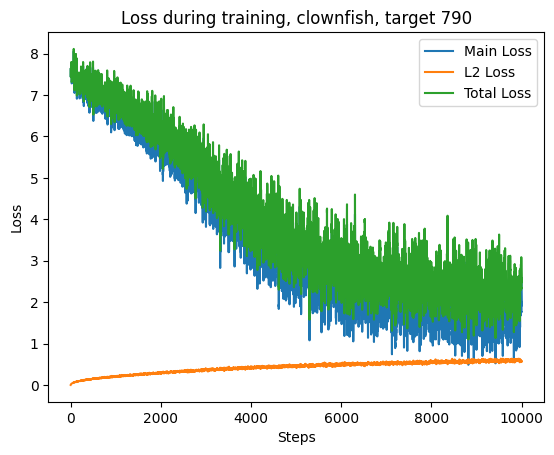

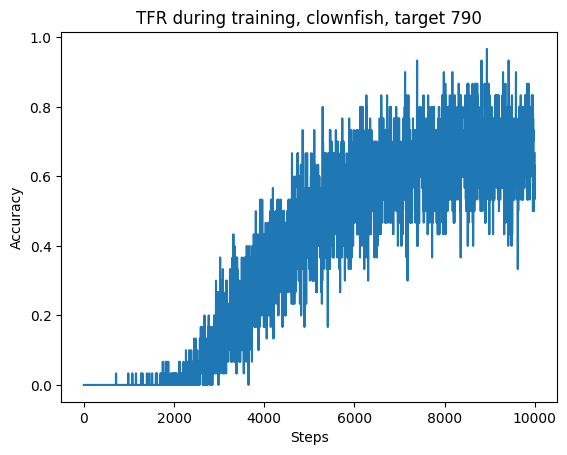

In [6]:
models = load_dataset("./dataset")

for model in models:
    # we only run algorithm on the clownfish model
    if model.name == "clownfish":
        # set the hyper params used by the model to load the texture, 3D model, and target label
        config.OBJ_PATH = model.obj_path
        config.TEXTURE_PATH = model.texture_path
        config.NAME = model.name
        
        print("Creating adversarial examples for model {}".format(model.name))
        # we already have 4 clownfish adversarial examples, just need one more
        config.TARGET_LABEL = get_random_target_label(model.labels)
        print("Target label {}".format(config.TARGET_LABEL))

        # run script to create adversarial texture for the given target
        %run main.py

At this point, we have 5 adversarial examples for the barrel, baseball, sport car and clownfish models. Due to being interrupted by Windows Update, we run the script to generate 5 adversarial examples for the other 6 models.

barrel: labels [427], texture ./dataset\barrel\barrel.jpg, obj ./dataset\barrel\barrel.obj
baseball: labels [429], texture ./dataset\baseball\baseball.png, obj ./dataset\baseball\baseball.obj
camaro: labels [817, 436, 751], texture ./dataset\camaro\camaro.png, obj ./dataset\camaro\camaro.obj
clownfish: labels [393], texture ./dataset\clownfish\clownfish.jpg, obj ./dataset\clownfish\clownfish.obj
crocodile: labels [49, 50], texture ./dataset\crocodile\crocodile.jpg, obj ./dataset\crocodile\crocodile.obj
german_shepherd: labels dog, texture ./dataset\german_shepherd\german_shepherd.png, obj ./dataset\german_shepherd\german_shepherd.obj
jeep: labels [609, 586, 408], texture ./dataset\jeep\jeep.png, obj ./dataset\jeep\jeep.obj
orange: labels [950], texture ./dataset\orange\orange.jpg, obj ./dataset\orange\orange.obj
orca: labels [148], texture ./dataset\orca\orca.png, obj ./dataset\orca\orca.obj
purse: labels [748, 893], texture ./dataset\purse\purse.png, obj ./dataset\purse\purse.obj
rugb

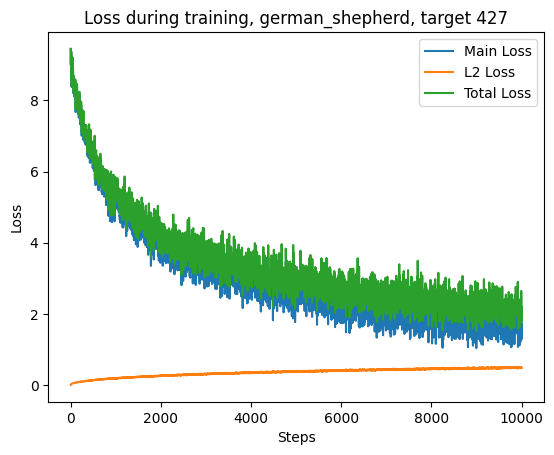

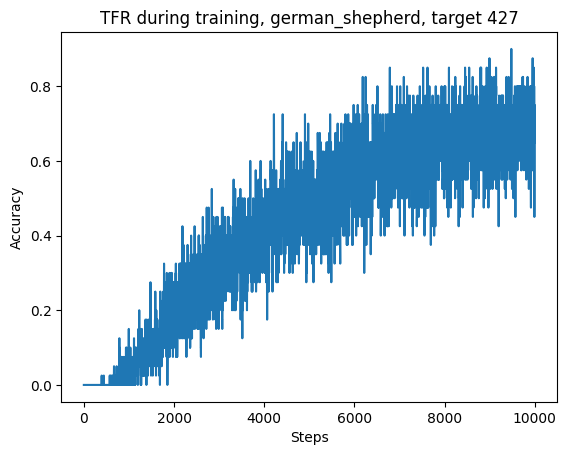

Target label 80
New renders for each step: 8
Step: 0
Loss: 9.244471549987793
Diff: -3.5272979736328125
Step: 200
Loss: 5.78515625
Diff: 433.56890869140625
Step: 400
Loss: 5.555729866027832
Diff: 1226.8443603515625
Step: 600
Loss: 2.8321242332458496
Diff: 2274.416015625
Step: 800
Loss: 2.567214012145996
Diff: 3298.86376953125
Step: 1000
Loss: 2.0038845539093018
Diff: 4110.884765625
Step: 1200
Loss: 2.0814690589904785
Diff: 4889.7607421875
Step: 1400
Loss: 1.5159498453140259
Diff: 5545.97412109375
Step: 1600
Loss: 0.8983430862426758
Diff: 6077.07080078125
Step: 1800
Loss: 0.9664801359176636
Diff: 6648.37890625
Step: 2000
Loss: 0.8897304534912109
Diff: 7279.9208984375
Step: 2200
Loss: 0.7045949697494507
Diff: 7756.8515625
Step: 2400
Loss: 0.5966631770133972
Diff: 8174.95849609375
Step: 2600
Loss: 0.8696443438529968
Diff: 8583.3310546875
Step: 2800
Loss: 0.3341584801673889
Diff: 8875.96875
Early Stopping, average loss over past 400 steps is 0.4993517491966486


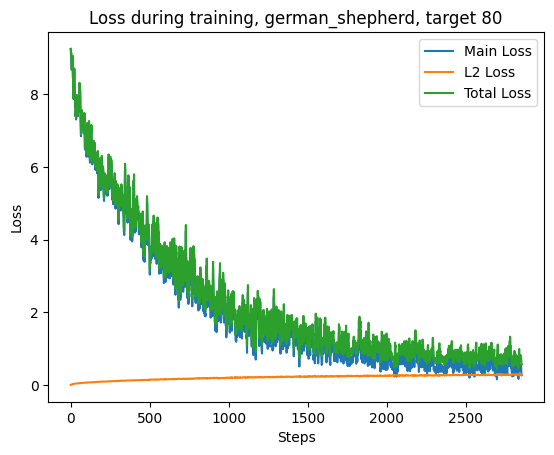

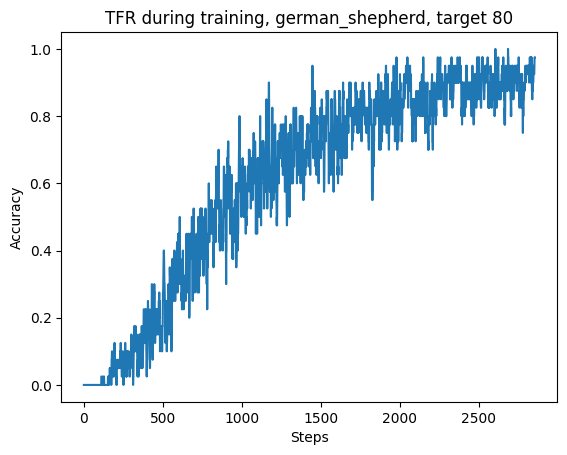

Target label 93
New renders for each step: 8
Step: 0
Loss: 8.154528617858887
Diff: 4.93958854675293
Step: 200
Loss: 3.6829962730407715
Diff: 843.4728393554688
Step: 400
Loss: 2.64237904548645
Diff: 1718.0667724609375
Step: 600
Loss: 2.835200309753418
Diff: 2451.6455078125
Step: 800
Loss: 2.3259117603302
Diff: 3209.948486328125
Step: 1000
Loss: 1.6751906871795654
Diff: 3886.347412109375
Step: 1200
Loss: 1.5618396997451782
Diff: 4615.57861328125
Step: 1400
Loss: 1.3262944221496582
Diff: 5369.5830078125
Step: 1600
Loss: 1.263907551765442
Diff: 6008.8896484375
Step: 1800
Loss: 1.5718939304351807
Diff: 6760.26904296875
Step: 2000
Loss: 1.321645975112915
Diff: 7474.05517578125
Step: 2200
Loss: 1.1695075035095215
Diff: 8165.1005859375
Step: 2400
Loss: 0.9662482142448425
Diff: 8845.33984375
Step: 2600
Loss: 0.9404565095901489
Diff: 9495.9912109375
Step: 2800
Loss: 0.483293354511261
Diff: 10128.0634765625
Step: 3000
Loss: 0.8236321210861206
Diff: 10820.03125
Step: 3200
Loss: 0.8051848411560059


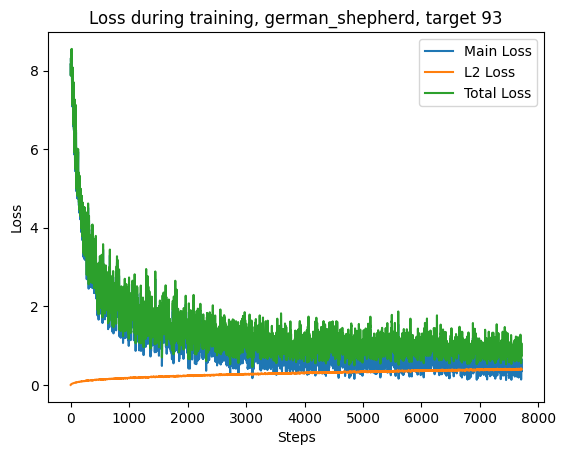

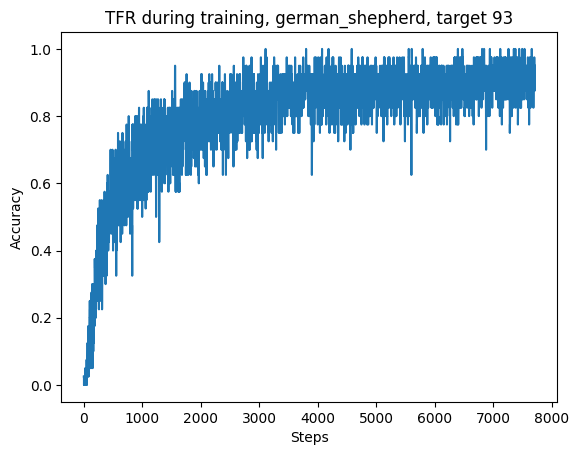

Target label 445
New renders for each step: 8
Step: 0
Loss: 8.76045036315918
Diff: -3.638115644454956
Step: 200
Loss: 6.183776378631592
Diff: 617.44580078125
Step: 400
Loss: 3.8710758686065674
Diff: 1757.94091796875
Step: 600
Loss: 2.9355080127716064
Diff: 2909.0419921875
Step: 800
Loss: 1.6334148645401
Diff: 3944.856201171875
Step: 1000
Loss: 1.1794044971466064
Diff: 4912.72998046875
Step: 1200
Loss: 1.3188831806182861
Diff: 5671.85986328125
Step: 1400
Loss: 1.12827467918396
Diff: 6558.10302734375
Step: 1600
Loss: 0.9996560215950012
Diff: 7220.82421875
Step: 1800
Loss: 0.8178110122680664
Diff: 7907.134765625
Step: 2000
Loss: 0.5332192182540894
Diff: 8591.3359375
Step: 2200
Loss: 0.12471736967563629
Diff: 9387.4482421875
Step: 2400
Loss: 0.4942541718482971
Diff: 10177.2109375
Step: 2600
Loss: 0.7340050935745239
Diff: 10926.2490234375
Early Stopping, average loss over past 400 steps is 0.4998625566065311


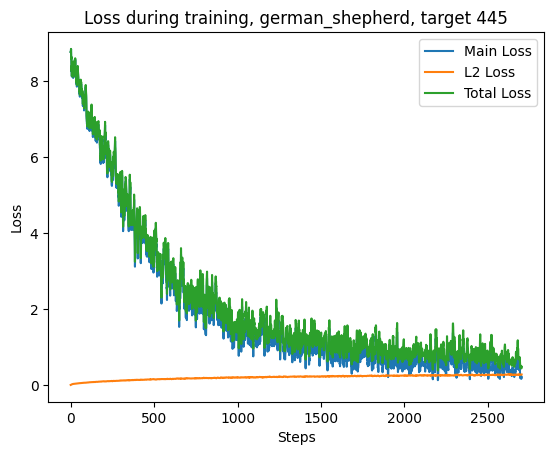

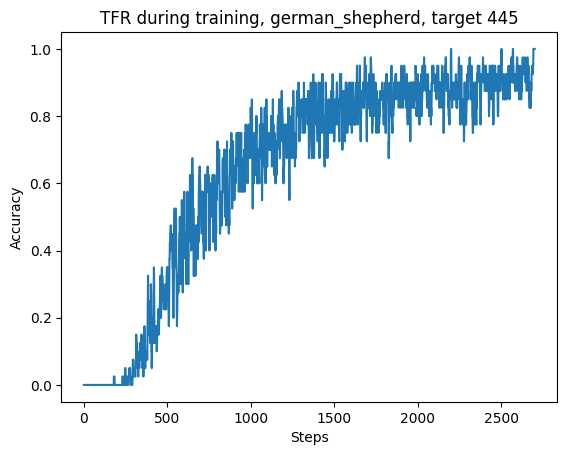

Target label 22
New renders for each step: 8
Step: 0
Loss: 8.723289489746094
Diff: -3.336135149002075
Step: 200
Loss: 3.0531604290008545
Diff: 724.3009033203125
Step: 400
Loss: 1.9618616104125977
Diff: 1355.684326171875
Step: 600
Loss: 1.7899844646453857
Diff: 1837.901123046875
Step: 800
Loss: 1.846949815750122
Diff: 2289.551513671875
Step: 1000
Loss: 1.7951911687850952
Diff: 2618.413818359375
Step: 1200
Loss: 0.584982693195343
Diff: 2905.605712890625
Step: 1400
Loss: 0.9361044764518738
Diff: 3158.416748046875
Step: 1600
Loss: 1.1614573001861572
Diff: 3320.58349609375
Step: 1800
Loss: 0.5944678783416748
Diff: 3478.279296875
Step: 2000
Loss: 0.5001586675643921
Diff: 3671.0810546875
Step: 2200
Loss: 0.7893209457397461
Diff: 3853.733642578125
Step: 2400
Loss: 0.6524794101715088
Diff: 3959.275390625
Step: 2600
Loss: 0.25974059104919434
Diff: 4150.88525390625
Step: 2800
Loss: 1.0152884721755981
Diff: 4297.962890625
Early Stopping, average loss over past 400 steps is 0.4997189095057547


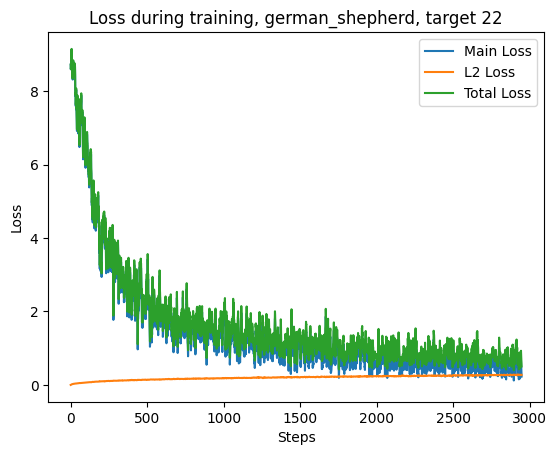

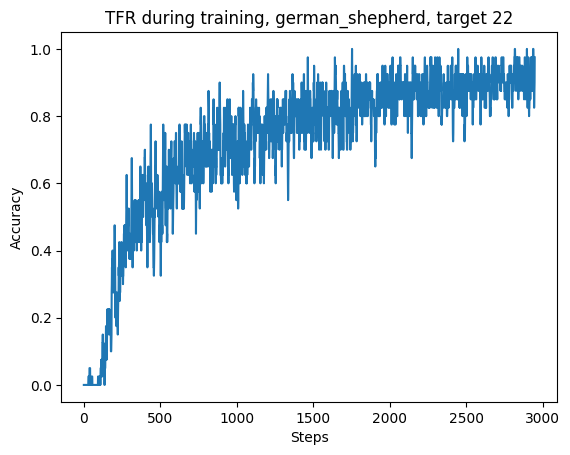

Creating adversarial examples for model orange
Target label 572
New renders for each step: 8
Step: 0
Loss: 9.013038635253906
Diff: 7.29509973526001
Step: 200
Loss: 0.7140172719955444
Diff: 3485.38427734375
Step: 400
Loss: 0.32372885942459106
Diff: 4566.23486328125
Early Stopping, average loss over past 400 steps is 0.4973999634385109


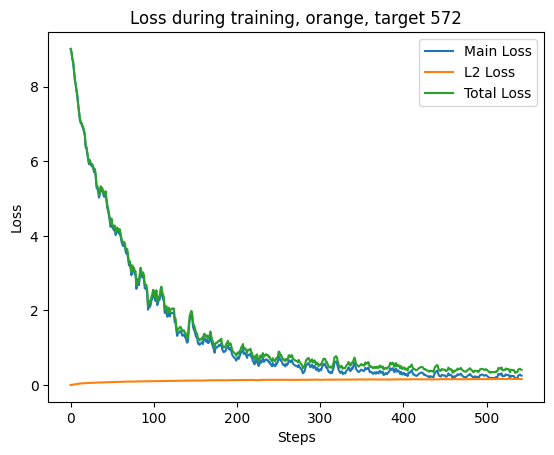

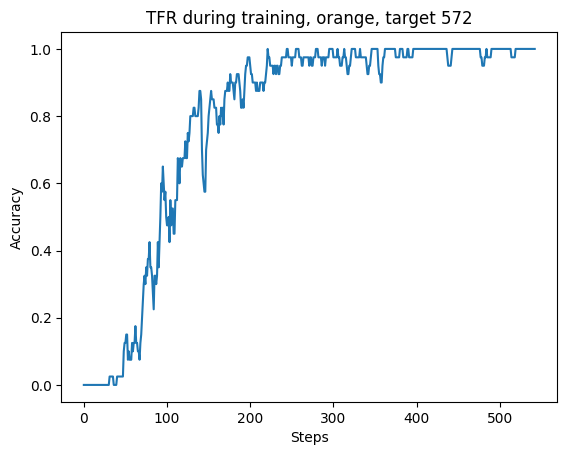

Target label 172
New renders for each step: 8
Step: 0
Loss: 9.051373481750488
Diff: 32.54818344116211
Step: 200
Loss: 0.4993627667427063
Diff: 4420.087890625
Step: 400
Loss: 0.03457322344183922
Diff: 5458.39990234375
Early Stopping, average loss over past 400 steps is 0.4994661917863414


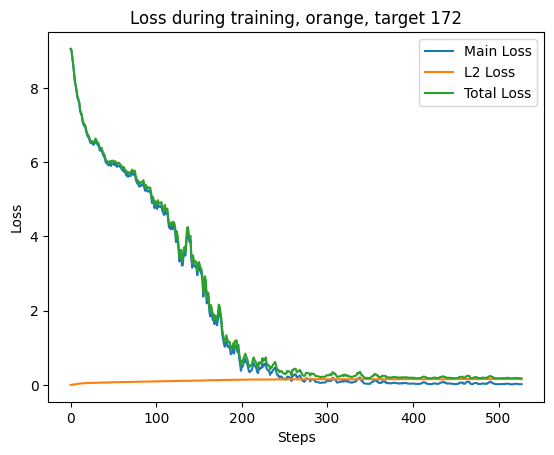

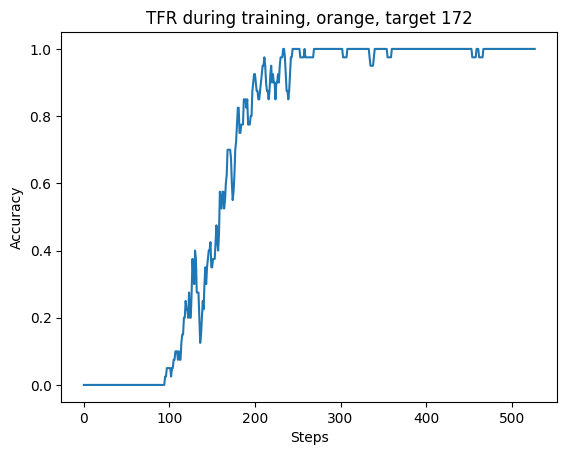

Target label 626
New renders for each step: 8
Step: 0
Loss: 9.505529403686523
Diff: 19.814313888549805
Step: 200
Loss: 4.008129596710205
Diff: 3668.962158203125
Step: 400
Loss: 2.9150807857513428
Diff: 5691.8203125
Step: 600
Loss: 2.1884262561798096
Diff: 6887.42041015625
Step: 800
Loss: 1.8919187784194946
Diff: 7727.78076171875
Step: 1000
Loss: 1.606347680091858
Diff: 8285.1435546875
Step: 1200
Loss: 1.2872800827026367
Diff: 8729.8662109375
Step: 1400
Loss: 1.0226579904556274
Diff: 9002.7578125
Step: 1600
Loss: 0.8513258099555969
Diff: 9279.3037109375
Step: 1800
Loss: 0.4894745945930481
Diff: 9476.626953125
Step: 2000
Loss: 0.48718175292015076
Diff: 9620.771484375
Step: 2200
Loss: 0.46509066224098206
Diff: 9755.2431640625
Early Stopping, average loss over past 400 steps is 0.49947327218949794


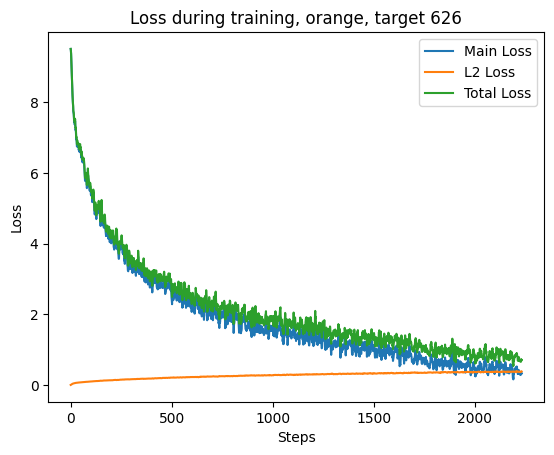

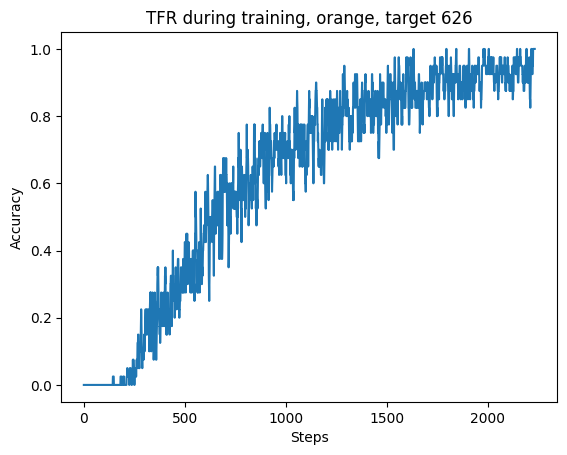

Target label 923
New renders for each step: 8
Step: 0
Loss: 8.828901290893555
Diff: -2.452529191970825
Step: 200
Loss: 1.1184731721878052
Diff: 3213.294921875
Step: 400
Loss: 0.3048606514930725
Diff: 4341.91650390625
Early Stopping, average loss over past 400 steps is 0.49922042289748786


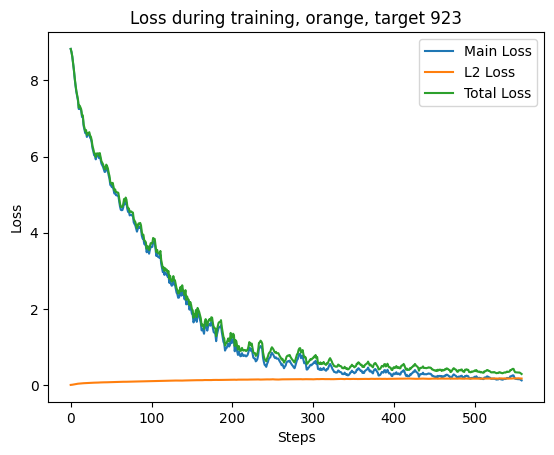

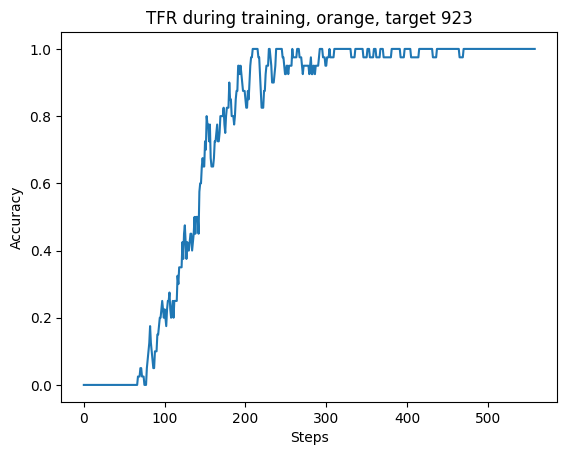

Target label 664
New renders for each step: 8
Step: 0
Loss: 8.441913604736328
Diff: 20.346277236938477


In [ ]:
models = load_dataset("./dataset")

for model in models:
    # we only run algorithm on models representing objects that the authors also used in their dataset
    # and not on the 4 models for which we already created adversarial examples
    if model.name not in ["crocodile", "jeep", "orca", "rugby_ball", "running_shoe"] \
        and model.name not in ["barrel", "baseball", "camaro", "clownfish"]:
            
        # set the hyper params used by the model to load the texture, 3D model, and target label
        config.OBJ_PATH = model.obj_path
        config.TEXTURE_PATH = model.texture_path
        config.NAME = model.name
        
        print("Creating adversarial examples for model {}".format(model.name))
        for i in range(5):
            config.TARGET_LABEL = get_random_target_label(model.labels)
            print("Target label {}".format(config.TARGET_LABEL))
            
            # run script to create adversarial texture for the given target
            %run main.py

My laptop shut down during the night while running the previous cell, and therefore I was logged out of the lab machine. Therefore, the creation of the fifth adversarial example for the orange model was interrupted, and we need to restart it.

barrel: labels [427], texture ./dataset\barrel\barrel.jpg, obj ./dataset\barrel\barrel.obj
baseball: labels [429], texture ./dataset\baseball\baseball.png, obj ./dataset\baseball\baseball.obj
camaro: labels [817, 436, 751], texture ./dataset\camaro\camaro.png, obj ./dataset\camaro\camaro.obj
clownfish: labels [393], texture ./dataset\clownfish\clownfish.jpg, obj ./dataset\clownfish\clownfish.obj
crocodile: labels [49, 50], texture ./dataset\crocodile\crocodile.jpg, obj ./dataset\crocodile\crocodile.obj
german_shepherd: labels dog, texture ./dataset\german_shepherd\german_shepherd.png, obj ./dataset\german_shepherd\german_shepherd.obj
jeep: labels [609, 586, 408], texture ./dataset\jeep\jeep.png, obj ./dataset\jeep\jeep.obj
orange: labels [950], texture ./dataset\orange\orange.jpg, obj ./dataset\orange\orange.obj
orca: labels [148], texture ./dataset\orca\orca.png, obj ./dataset\orca\orca.obj
purse: labels [748, 893], texture ./dataset\purse\purse.png, obj ./dataset\purse\purse.obj
rugb

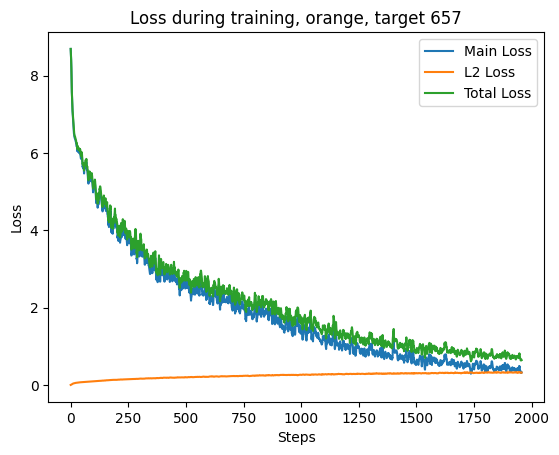

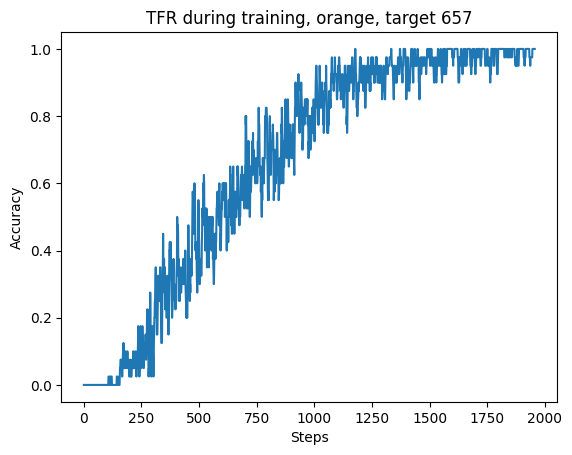

In [6]:
models = load_dataset("./dataset")

for model in models:
    # we only run algorithm on the clownfish model
    if model.name == "orange":
        # set the hyper params used by the model to load the texture, 3D model, and target label
        config.OBJ_PATH = model.obj_path
        config.TEXTURE_PATH = model.texture_path
        config.NAME = model.name
        
        print("Creating adversarial examples for model {}".format(model.name))
        # we already have 4 clownfish adversarial examples, just need one more
        config.TARGET_LABEL = get_random_target_label(model.labels)
        print("Target label {}".format(config.TARGET_LABEL))

        # run script to create adversarial texture for the given target
        %run main.py

We re-start the training loop to generate adversarial examples for the 4 remaining models.

barrel: labels [427], texture ./dataset\barrel\barrel.jpg, obj ./dataset\barrel\barrel.obj
baseball: labels [429], texture ./dataset\baseball\baseball.png, obj ./dataset\baseball\baseball.obj
camaro: labels [817, 436, 751], texture ./dataset\camaro\camaro.png, obj ./dataset\camaro\camaro.obj
clownfish: labels [393], texture ./dataset\clownfish\clownfish.jpg, obj ./dataset\clownfish\clownfish.obj
crocodile: labels [49, 50], texture ./dataset\crocodile\crocodile.jpg, obj ./dataset\crocodile\crocodile.obj
german_shepherd: labels dog, texture ./dataset\german_shepherd\german_shepherd.png, obj ./dataset\german_shepherd\german_shepherd.obj
jeep: labels [609, 586, 408], texture ./dataset\jeep\jeep.png, obj ./dataset\jeep\jeep.obj
orange: labels [950], texture ./dataset\orange\orange.jpg, obj ./dataset\orange\orange.obj
orca: labels [148], texture ./dataset\orca\orca.png, obj ./dataset\orca\orca.obj
purse: labels [748, 893], texture ./dataset\purse\purse.png, obj ./dataset\purse\purse.obj
rugb

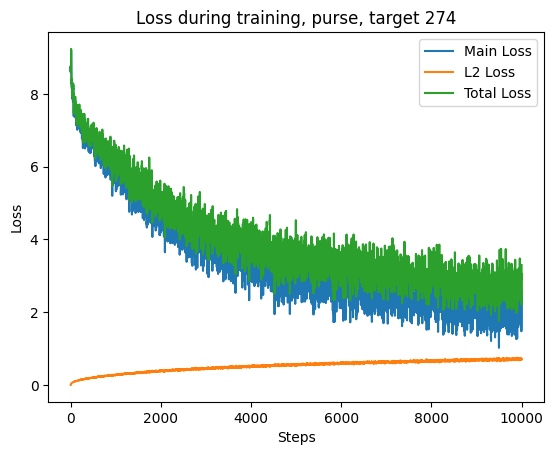

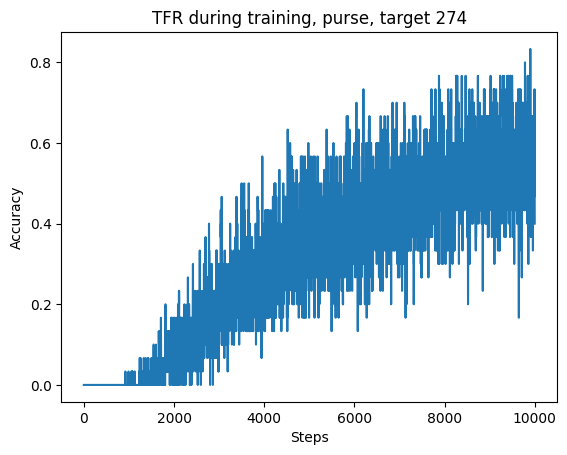

Target label 180
New renders for each step: 6
Step: 0
Loss: 9.475964546203613
Diff: -5.04273796081543
Step: 200
Loss: 7.710386276245117
Diff: -498.1412048339844
Step: 400
Loss: 7.572033405303955
Diff: -748.8040771484375
Step: 600
Loss: 7.2078537940979
Diff: -97.06733703613281
Step: 800
Loss: 7.08485746383667
Diff: 1516.96875
Step: 1000
Loss: 6.67094612121582
Diff: 3992.380615234375
Step: 1200
Loss: 6.780068397521973
Diff: 7546.525390625
Step: 1400
Loss: 6.438936233520508
Diff: 11291.208984375
Step: 1600
Loss: 6.089346408843994
Diff: 16209.8427734375
Step: 1800
Loss: 6.047019004821777
Diff: 21164.458984375
Step: 2000
Loss: 6.290946960449219
Diff: 26593.98828125
Step: 2200
Loss: 5.947114944458008
Diff: 32338.013671875
Step: 2400
Loss: 6.287858963012695
Diff: 38765.17578125
Step: 2600
Loss: 5.713861465454102
Diff: 45693.9453125
Step: 2800
Loss: 5.952441215515137
Diff: 52427.62890625
Step: 3000
Loss: 5.686004638671875
Diff: 59779.32421875
Step: 3200
Loss: 5.443380832672119
Diff: 67336.1796

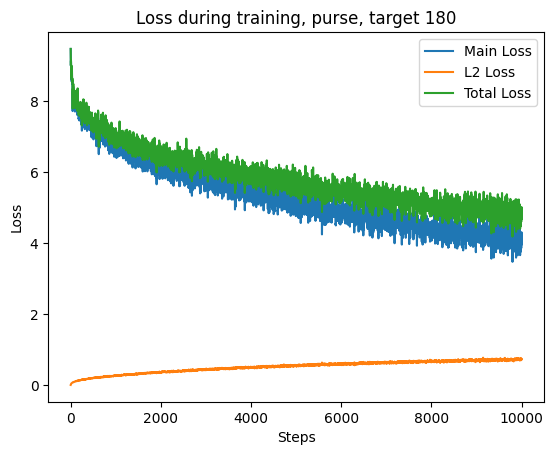

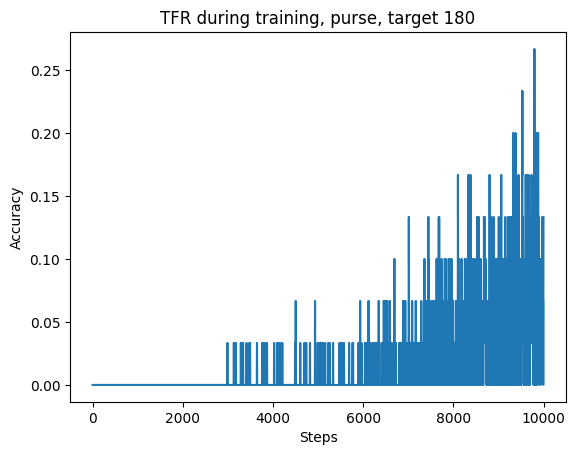

Target label 307
New renders for each step: 6
Step: 0
Loss: 8.879180908203125
Diff: 4.868283748626709
Step: 200
Loss: 6.856540203094482
Diff: -25.054317474365234
Step: 400
Loss: 6.220437049865723
Diff: 1123.4244384765625
Step: 600
Loss: 5.284852027893066
Diff: 4038.857666015625
Step: 800
Loss: 4.572482585906982
Diff: 8233.353515625
Step: 1000
Loss: 3.8704488277435303
Diff: 13134.248046875
Step: 1200
Loss: 3.86165714263916
Diff: 18691.80859375
Step: 1400
Loss: 3.1371564865112305
Diff: 24645.171875
Step: 1600
Loss: 3.2093348503112793
Diff: 31076.1875
Step: 1800
Loss: 2.461884021759033
Diff: 37798.484375
Step: 2000
Loss: 2.0956273078918457
Diff: 44422.58984375
Step: 2200
Loss: 1.808959722518921
Diff: 51292.1015625
Step: 2400
Loss: 1.6835746765136719
Diff: 58012.5
Step: 2600
Loss: 1.868811011314392
Diff: 64211.2890625
Step: 2800
Loss: 1.4845210313796997
Diff: 69686.4921875
Step: 3000
Loss: 1.4705049991607666
Diff: 75535.0
Step: 3200
Loss: 1.1577627658843994
Diff: 81525.390625
Step: 3400
Lo

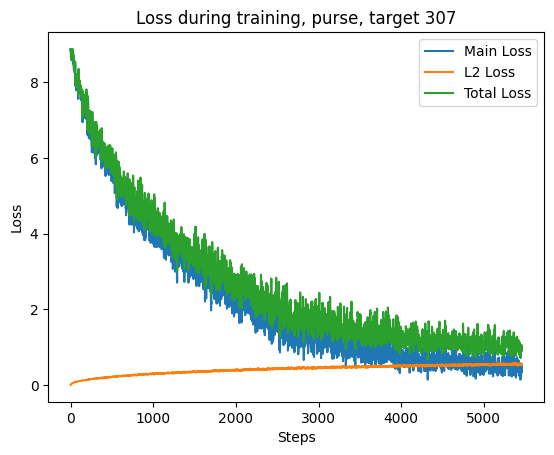

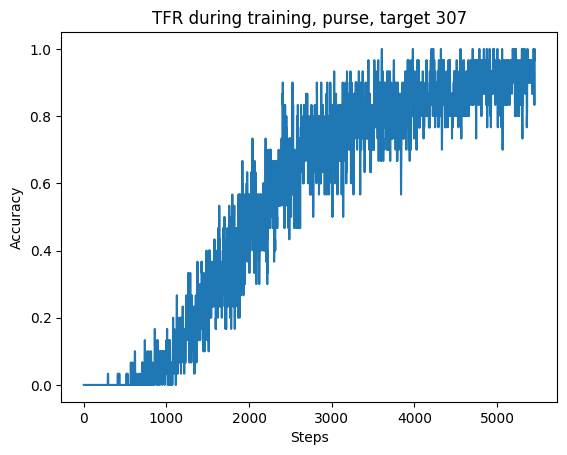

Target label 977
New renders for each step: 6
Step: 0
Loss: 8.325610160827637
Diff: -9.150647163391113
Step: 200
Loss: 6.3580522537231445
Diff: -127.42849731445312
Step: 400
Loss: 6.214350700378418
Diff: 604.6775512695312
Step: 600
Loss: 5.865628719329834
Diff: 2483.607666015625
Step: 800
Loss: 6.092988967895508
Diff: 5277.45166015625
Step: 1000
Loss: 5.658694744110107
Diff: 9053.4892578125
Step: 1200
Loss: 5.413513660430908
Diff: 13789.515625
Step: 1400
Loss: 5.159254550933838
Diff: 19044.08984375
Step: 1600
Loss: 5.349403381347656
Diff: 24910.93359375
Step: 1800
Loss: 5.079951286315918
Diff: 31148.61328125
Step: 2000
Loss: 4.843066215515137
Diff: 38108.02734375
Step: 2200
Loss: 4.867861270904541
Diff: 45500.125
Step: 2400
Loss: 5.033107280731201
Diff: 53240.16015625
Step: 2600
Loss: 4.671255111694336
Diff: 61079.3046875
Step: 2800
Loss: 4.802797317504883
Diff: 69424.9453125
Step: 3000
Loss: 4.685789108276367
Diff: 78245.5234375
Step: 3200
Loss: 4.859838962554932
Diff: 87152.703125
St

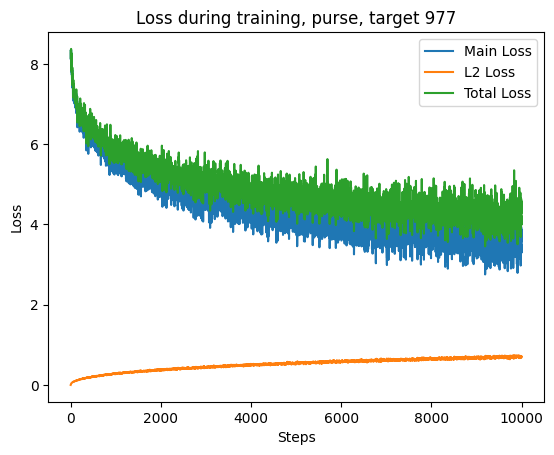

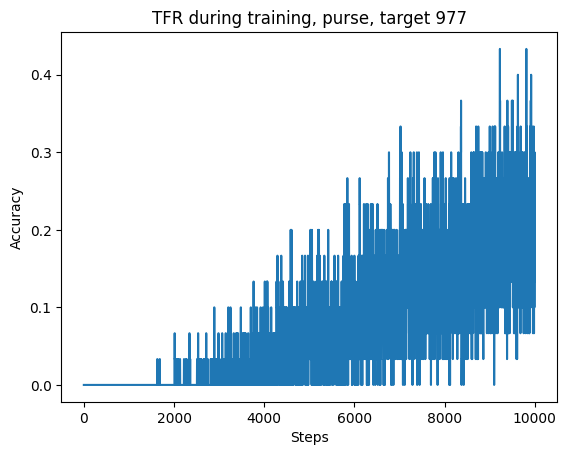

Target label 19
New renders for each step: 6
Step: 0
Loss: 9.425058364868164
Diff: -16.277055740356445
Step: 200
Loss: 7.786532402038574
Diff: 8.588540077209473
Step: 400
Loss: 6.943226337432861
Diff: 751.6983032226562
Step: 600
Loss: 6.8240580558776855
Diff: 2357.591064453125
Step: 800
Loss: 5.924244403839111
Diff: 5101.9130859375
Step: 1000
Loss: 5.9398651123046875
Diff: 8788.6142578125
Step: 1200
Loss: 5.817228317260742
Diff: 13554.92578125
Step: 1400
Loss: 5.752620220184326
Diff: 18752.71484375
Step: 1600
Loss: 5.366072177886963
Diff: 24455.814453125
Step: 1800
Loss: 5.063195705413818
Diff: 30444.5625
Step: 2000
Loss: 5.646304130554199
Diff: 37085.5078125
Step: 2200
Loss: 5.496766090393066
Diff: 43860.55078125
Step: 2400
Loss: 4.917910099029541
Diff: 51182.8203125
Step: 2600
Loss: 4.454841136932373
Diff: 58536.6640625
Step: 2800
Loss: 4.788650989532471
Diff: 66396.6796875
Step: 3000
Loss: 3.937140464782715
Diff: 74575.515625
Step: 3200
Loss: 4.75824499130249
Diff: 83085.296875
Step

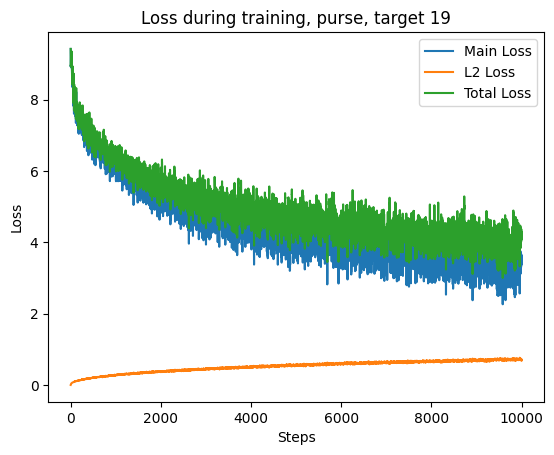

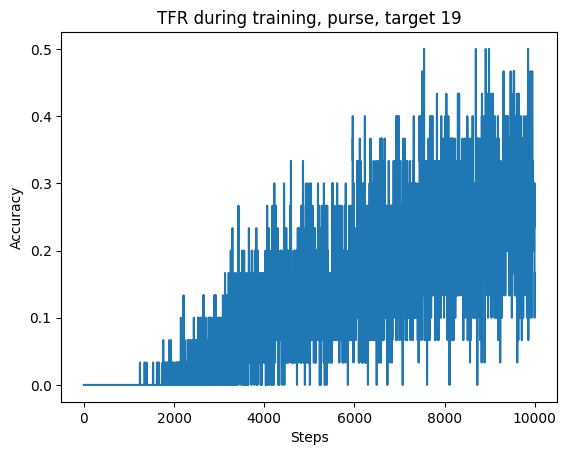

Creating adversarial examples for model sea_turtle
Target label 731
New renders for each step: 6
Step: 0
Loss: 9.879881858825684
Diff: 9.607199668884277
Step: 200
Loss: 7.415575981140137
Diff: -1483.9307861328125
Step: 400
Loss: 6.236243724822998
Diff: -3544.11083984375
Step: 600
Loss: 5.026333808898926
Diff: -5658.40234375
Step: 800
Loss: 5.403836250305176
Diff: -7492.65673828125
Step: 1000
Loss: 4.967249870300293
Diff: -9661.4697265625
Step: 1200
Loss: 4.403900623321533
Diff: -11661.955078125
Step: 1400
Loss: 4.6397857666015625
Diff: -13500.005859375
Step: 1600
Loss: 4.499558925628662
Diff: -15250.5341796875
Step: 1800
Loss: 3.5811922550201416
Diff: -17150.310546875
Step: 2000
Loss: 3.436380624771118
Diff: -18710.44921875
Step: 2200
Loss: 3.885620355606079
Diff: -20125.234375
Step: 2400
Loss: 3.702327013015747
Diff: -21265.736328125
Step: 2600
Loss: 2.940523862838745
Diff: -22773.501953125
Step: 2800
Loss: 3.2435622215270996
Diff: -24366.474609375
Step: 3000
Loss: 2.7896196842193604


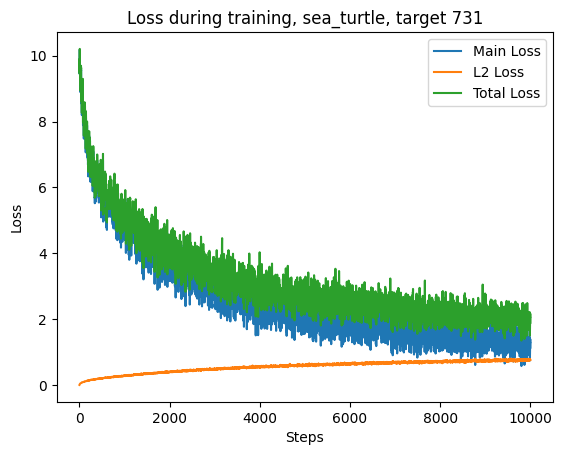

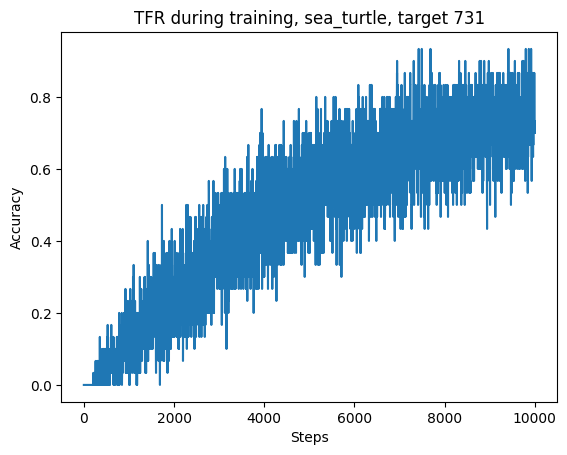

Target label 516
New renders for each step: 6
Step: 0
Loss: 9.846789360046387
Diff: 0.22057533264160156
Step: 200
Loss: 8.128764152526855
Diff: -1252.0455322265625
Step: 400
Loss: 7.484114646911621
Diff: -2406.71435546875
Step: 600
Loss: 7.422365188598633
Diff: -3666.968505859375
Step: 800
Loss: 6.900528907775879
Diff: -4745.68896484375
Step: 1000
Loss: 6.729560375213623
Diff: -6461.2255859375
Step: 1200
Loss: 6.4593505859375
Diff: -8422.3603515625
Step: 1400
Loss: 6.530639171600342
Diff: -10187.5224609375
Step: 1600
Loss: 6.1679606437683105
Diff: -12257.4775390625
Step: 1800
Loss: 6.463987350463867
Diff: -14130.1396484375
Step: 2000
Loss: 6.042486667633057
Diff: -16097.6201171875
Step: 2200
Loss: 5.88572883605957
Diff: -18257.001953125
Step: 2400
Loss: 5.852402687072754
Diff: -20317.3203125
Step: 2600
Loss: 5.875714302062988
Diff: -22678.8046875
Step: 2800
Loss: 5.814368724822998
Diff: -24914.48046875
Step: 3000
Loss: 5.625272750854492
Diff: -26944.974609375
Step: 3200
Loss: 5.6897602

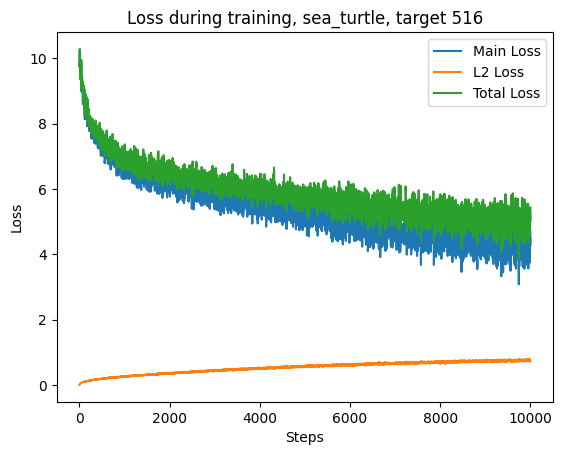

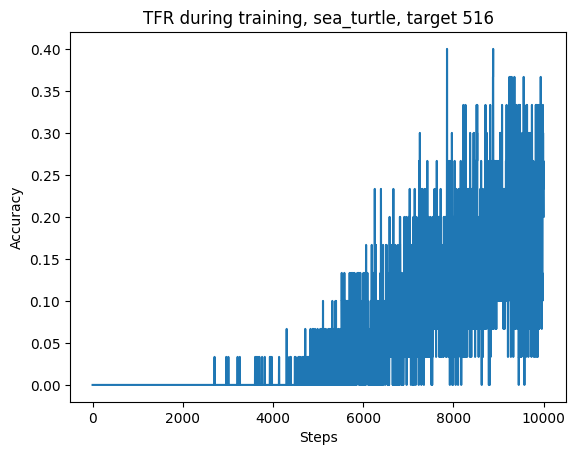

Target label 315
New renders for each step: 6
Step: 0
Loss: 9.546359062194824
Diff: -3.5374879837036133
Step: 200
Loss: 7.032374858856201
Diff: -1404.649658203125
Step: 400
Loss: 5.740826606750488
Diff: -3375.75146484375
Step: 600
Loss: 4.052587032318115
Diff: -6464.86083984375
Step: 800
Loss: 3.1352248191833496
Diff: -9079.5341796875
Step: 1000
Loss: 0.8925077319145203
Diff: -11409.1376953125
Step: 1200
Loss: 1.2051162719726562
Diff: -12750.9912109375
Step: 1400
Loss: 0.5153595209121704
Diff: -14075.32421875
Step: 1600
Loss: 0.7927847504615784
Diff: -15407.8359375
Early Stopping, average loss over past 400 steps is 0.4998170478269458


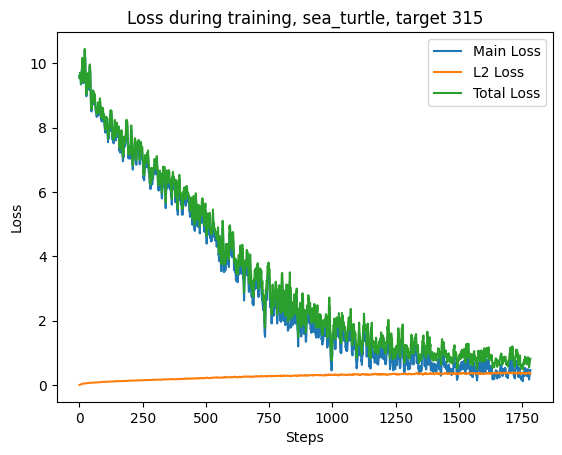

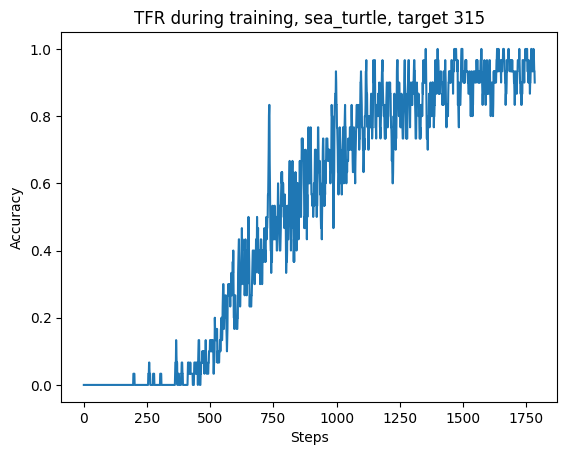

Target label 193
New renders for each step: 6
Step: 0
Loss: 10.265740394592285
Diff: -7.5742411613464355
Step: 200
Loss: 7.692451000213623
Diff: -1170.617431640625
Step: 400
Loss: 6.668908596038818
Diff: -2343.991455078125
Step: 600
Loss: 5.071713447570801
Diff: -4074.980224609375
Step: 800
Loss: 4.009439945220947
Diff: -5881.7724609375
Step: 1000
Loss: 3.6372828483581543
Diff: -8619.041015625
Step: 1200
Loss: 1.5261826515197754
Diff: -11399.779296875
Step: 1400
Loss: 1.3640704154968262
Diff: -13088.8330078125
Step: 1600
Loss: 0.8938738703727722
Diff: -14306.931640625
Step: 1800
Loss: 0.5755541324615479
Diff: -15082.546875
Step: 2000
Loss: 0.4524981677532196
Diff: -16003.3095703125
Early Stopping, average loss over past 400 steps is 0.4999984850361943


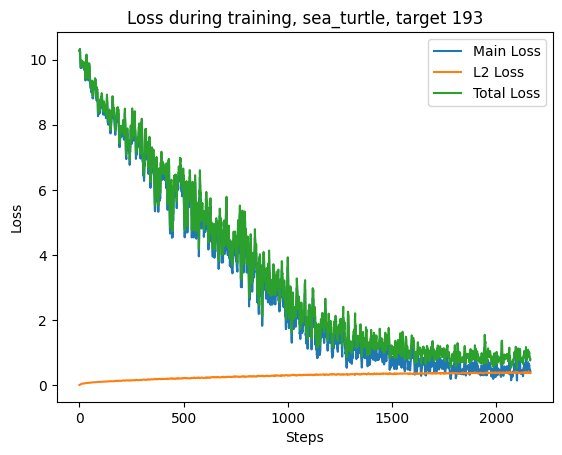

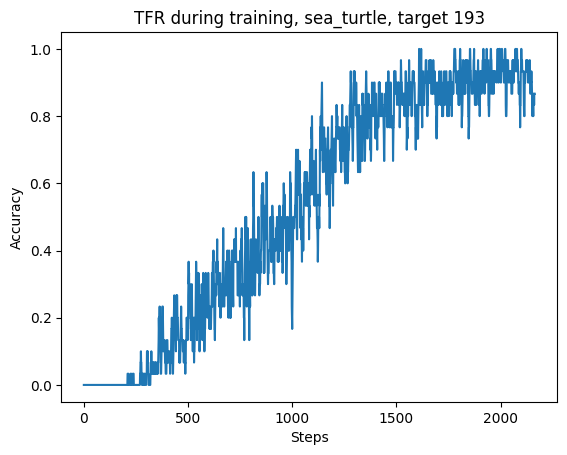

Target label 288
New renders for each step: 6
Step: 0
Loss: 7.940222263336182
Diff: -3.1114370822906494
Step: 200
Loss: 4.606022834777832
Diff: -1176.358154296875
Step: 400
Loss: 3.7932019233703613
Diff: -2925.60205078125
Step: 600
Loss: 2.802762269973755
Diff: -5207.91357421875
Step: 800
Loss: 1.5042372941970825
Diff: -7618.89599609375
Step: 1000
Loss: 1.3166308403015137
Diff: -10364.3720703125
Step: 1200
Loss: 0.717663049697876
Diff: -12785.9541015625
Step: 1400
Loss: 0.2945006489753723
Diff: -14527.578125
Step: 1600
Loss: 0.4021473824977875
Diff: -15937.302734375
Early Stopping, average loss over past 400 steps is 0.4978923398256302


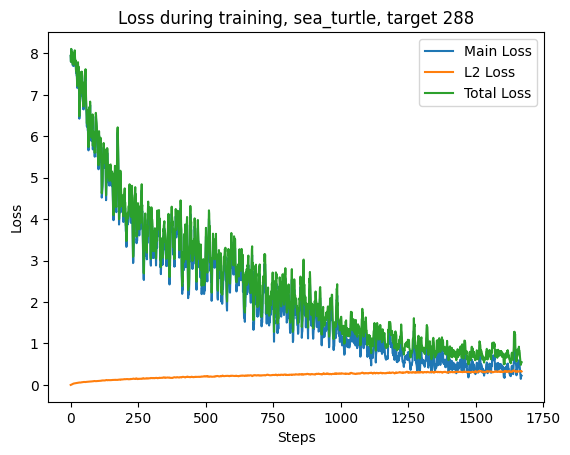

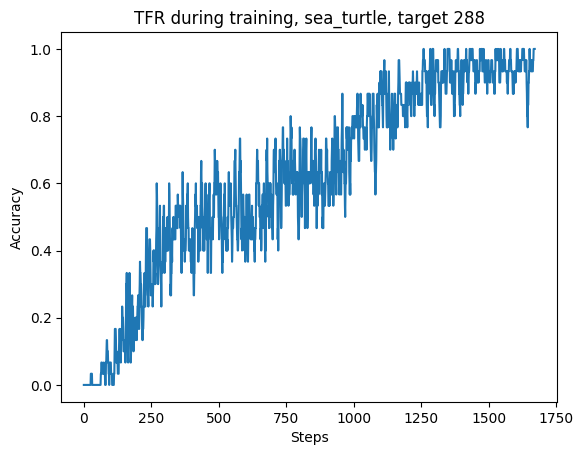

Creating adversarial examples for model taxi
Target label 581
New renders for each step: 8
Step: 0
Loss: 8.71367359161377
Diff: 680.3026123046875
Step: 200
Loss: 3.375251293182373
Diff: 16959.91015625
Step: 400
Loss: 2.3556265830993652
Diff: 23331.263671875
Step: 600
Loss: 2.2459123134613037
Diff: 27750.546875
Step: 800
Loss: 1.1761847734451294
Diff: 31230.177734375
Step: 1000
Loss: 0.7487176060676575
Diff: 34091.609375
Step: 1200
Loss: 0.6082448363304138
Diff: 36472.14453125
Step: 1400
Loss: 0.7203465700149536
Diff: 38630.67578125
Step: 1600
Loss: 0.6137263774871826
Diff: 40668.05859375
Step: 1800
Loss: 0.5095404386520386
Diff: 42363.8984375
Step: 2000
Loss: 0.1959027200937271
Diff: 43920.8828125
Early Stopping, average loss over past 400 steps is 0.4993754593655467


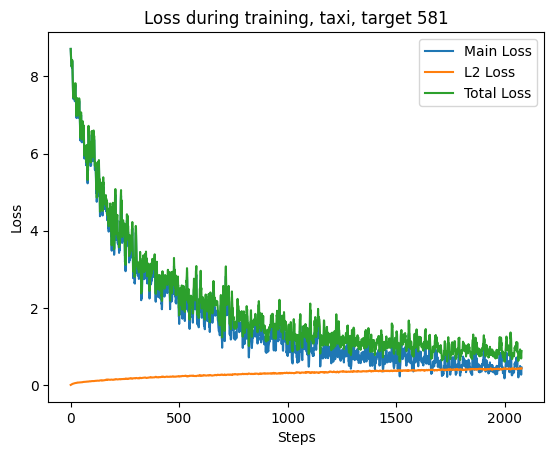

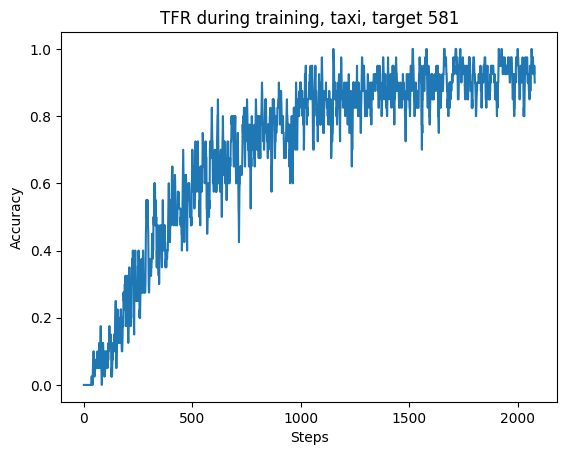

Target label 402
New renders for each step: 8
Step: 0
Loss: 8.022550582885742
Diff: 663.6553344726562
Step: 200
Loss: 1.512330174446106
Diff: 16980.83984375
Step: 400
Loss: 1.4499197006225586
Diff: 22503.2421875
Step: 600
Loss: 0.3967975974082947
Diff: 25825.408203125
Step: 800
Loss: 0.49106135964393616
Diff: 28171.01953125
Early Stopping, average loss over past 400 steps is 0.4996369881555438


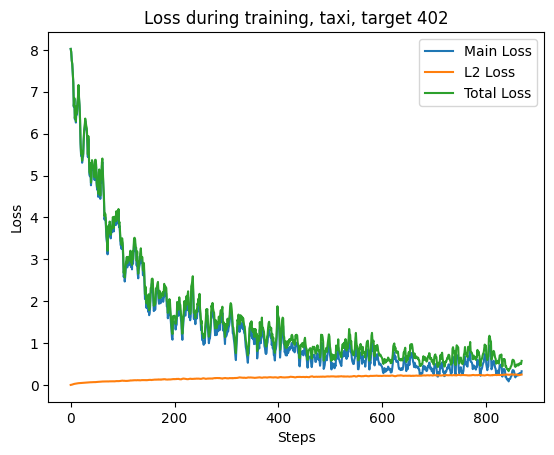

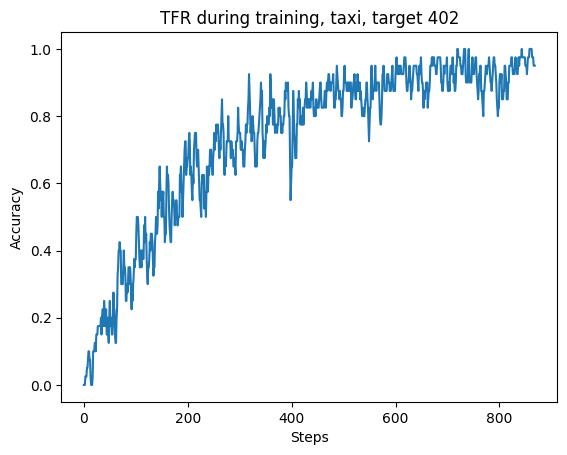

Target label 516
New renders for each step: 8
Step: 0
Loss: 8.076830863952637
Diff: 673.0698852539062
Step: 200
Loss: 4.712823390960693
Diff: 16550.12890625
Step: 400
Loss: 2.6054039001464844
Diff: 23169.46875
Step: 600
Loss: 1.6694473028182983
Diff: 27571.328125
Step: 800
Loss: 0.5002387762069702
Diff: 30619.857421875
Step: 1000
Loss: 0.8805074691772461
Diff: 33376.796875
Step: 1200
Loss: 0.3998327851295471
Diff: 35838.8515625
Step: 1400
Loss: 1.1307995319366455
Diff: 38065.53515625
Step: 1600
Loss: 0.7368301153182983
Diff: 40384.43359375
Step: 1800
Loss: 0.46752771735191345
Diff: 42351.609375
Step: 2000
Loss: 0.5898800492286682
Diff: 44231.05078125
Step: 2200
Loss: 0.1642341911792755
Diff: 45972.64453125
Early Stopping, average loss over past 400 steps is 0.499891056753695


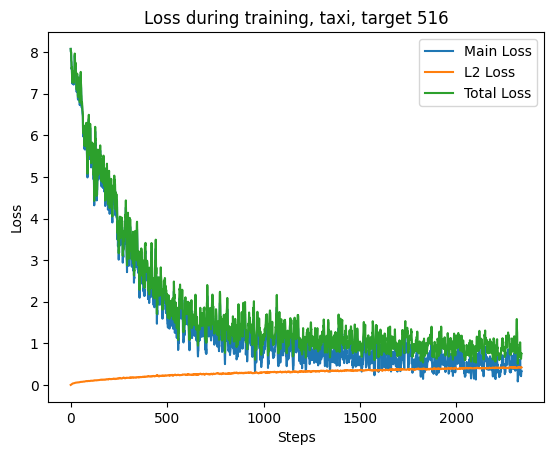

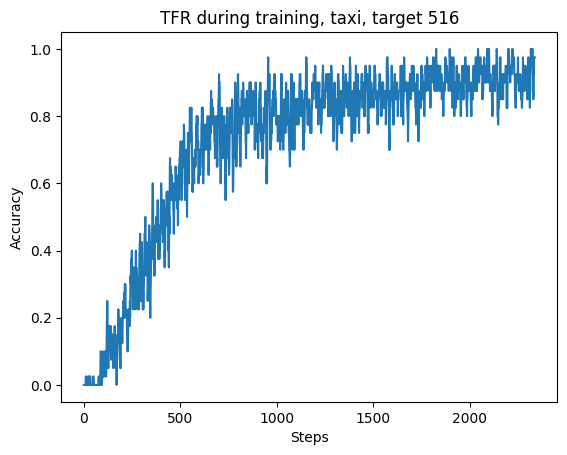

Target label 224
New renders for each step: 8
Step: 0
Loss: 9.006403923034668
Diff: 681.97216796875
Step: 200
Loss: 6.144537448883057
Diff: 16111.8046875
Step: 400
Loss: 6.287314414978027
Diff: 22367.15234375
Step: 600
Loss: 5.081307411193848
Diff: 26673.08984375
Step: 800
Loss: 5.533714294433594
Diff: 30131.826171875
Step: 1000
Loss: 4.971885681152344
Diff: 33151.6328125
Step: 1200
Loss: 4.127283096313477
Diff: 35780.46875
Step: 1400
Loss: 4.309052467346191
Diff: 38398.6015625
Step: 1600
Loss: 3.2719531059265137
Diff: 40923.24609375
Step: 1800
Loss: 2.8850135803222656
Diff: 43509.2109375
Step: 2000
Loss: 3.724597454071045
Diff: 45863.4609375
Step: 2200
Loss: 3.4520316123962402
Diff: 48157.0234375
Step: 2400
Loss: 2.812659502029419
Diff: 50607.7734375
Step: 2600
Loss: 3.247046709060669
Diff: 52744.33203125
Step: 2800
Loss: 3.139962673187256
Diff: 54715.84375
Step: 3000
Loss: 3.206435441970825
Diff: 56660.44140625
Step: 3200
Loss: 3.3328216075897217
Diff: 58597.86328125
Step: 3400
Loss:

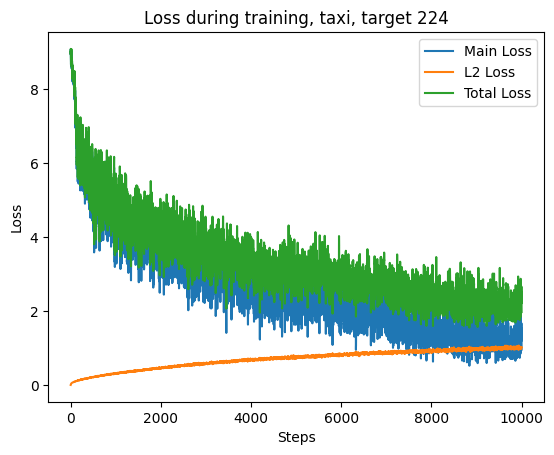

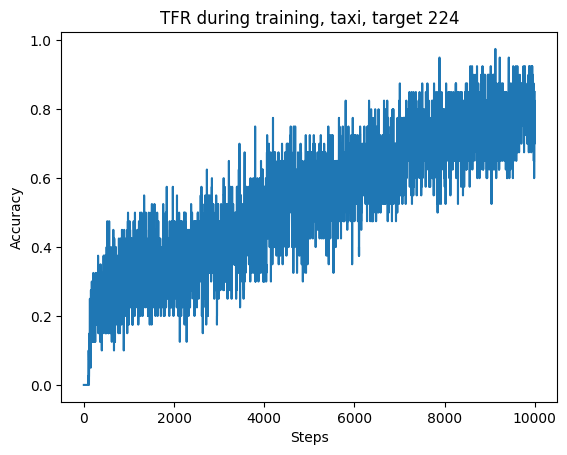

Target label 336
New renders for each step: 8
Step: 0
Loss: 8.178831100463867
Diff: 657.3402099609375
Step: 200
Loss: 6.831872463226318
Diff: 15748.0263671875
Step: 400
Loss: 5.903994083404541
Diff: 21704.435546875
Step: 600
Loss: 5.754197120666504
Diff: 26003.66015625
Step: 800
Loss: 3.8280014991760254
Diff: 29664.001953125
Step: 1000
Loss: 3.7183449268341064
Diff: 32904.8984375
Step: 1200
Loss: 4.100733757019043
Diff: 35998.05078125
Step: 1400
Loss: 3.1759114265441895
Diff: 38867.44140625
Step: 1600
Loss: 3.690232038497925
Diff: 41603.28515625
Step: 1800
Loss: 2.7028167247772217
Diff: 44248.28515625
Step: 2000
Loss: 2.353015899658203
Diff: 46928.6953125
Step: 2200
Loss: 2.4111974239349365
Diff: 49588.3515625
Step: 2400
Loss: 2.682553768157959
Diff: 52061.55859375
Step: 2600
Loss: 2.1367685794830322
Diff: 54280.984375
Step: 2800
Loss: 1.5834163427352905
Diff: 56450.84765625
Step: 3000
Loss: 1.8060433864593506
Diff: 58399.73046875
Step: 3200
Loss: 0.6600061655044556
Diff: 60374.1601562

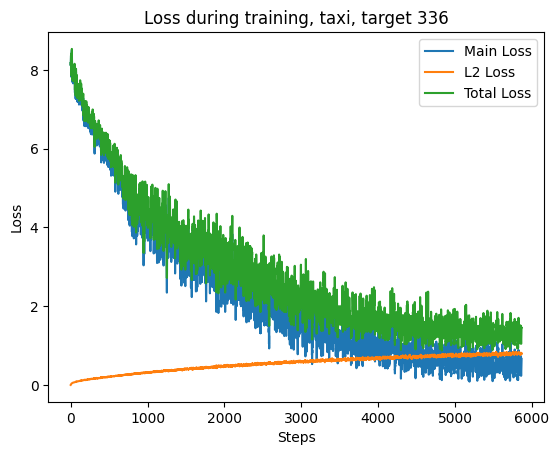

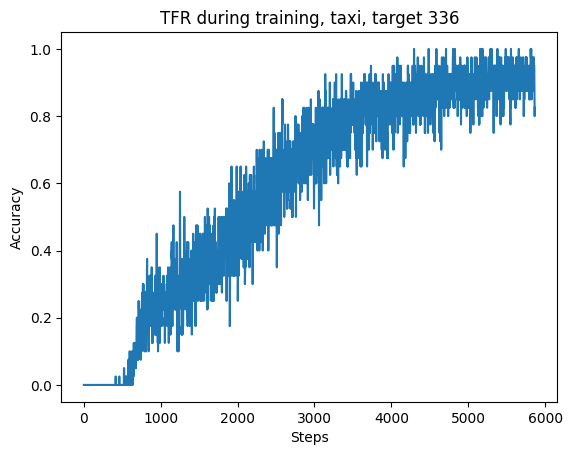

Creating adversarial examples for model teddy
Target label 202
New renders for each step: 8
Step: 0
Loss: 9.275039672851562
Diff: 7.8988423347473145
Step: 200
Loss: 3.1965584754943848
Diff: 330.1454162597656
Step: 400
Loss: 0.2945075035095215
Diff: 380.48492431640625
Step: 600
Loss: 0.15401645004749298
Diff: 324.4817199707031
Early Stopping, average loss over past 400 steps is 0.4995384190604091


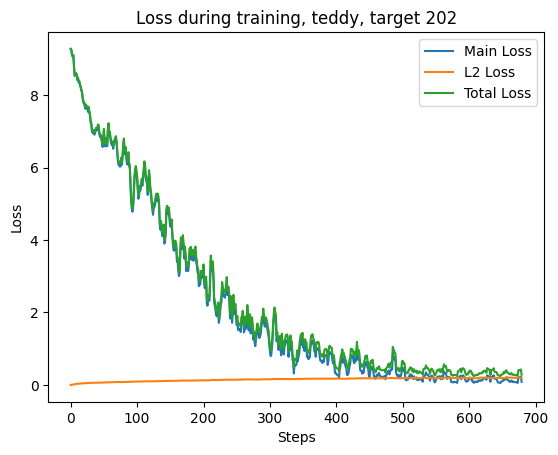

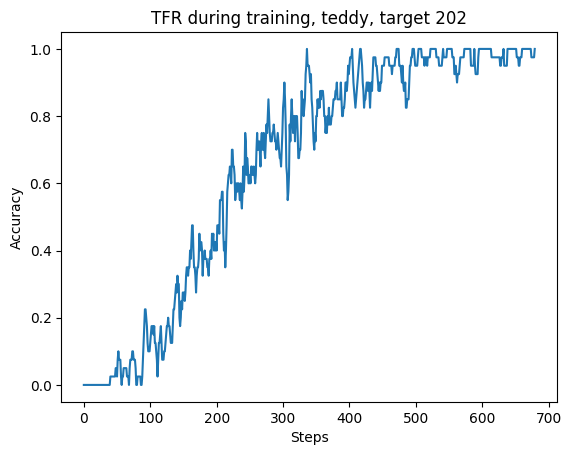

Target label 736
New renders for each step: 8
Step: 0
Loss: 9.116530418395996
Diff: -2.141789674758911
Step: 200
Loss: 5.667637825012207
Diff: -285.4273986816406
Step: 400
Loss: 3.6775805950164795
Diff: -1061.7117919921875
Step: 600
Loss: 1.9088561534881592
Diff: -2034.5499267578125
Step: 800
Loss: 1.4231276512145996
Diff: -2962.06787109375
Step: 1000
Loss: 0.844851016998291
Diff: -3777.779296875
Step: 1200
Loss: 0.5847852826118469
Diff: -4529.24755859375
Step: 1400
Loss: 0.27437838912010193
Diff: -5253.1044921875
Early Stopping, average loss over past 400 steps is 0.4994143844023347


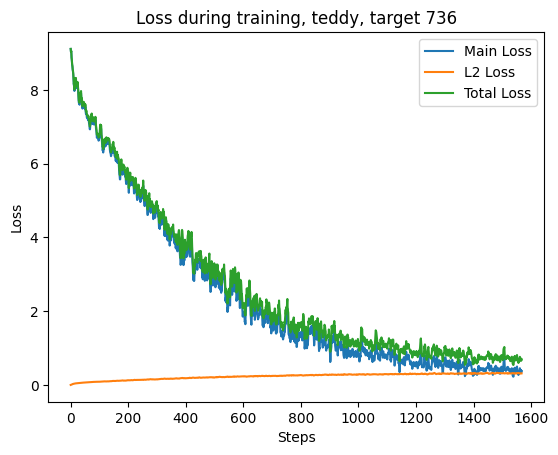

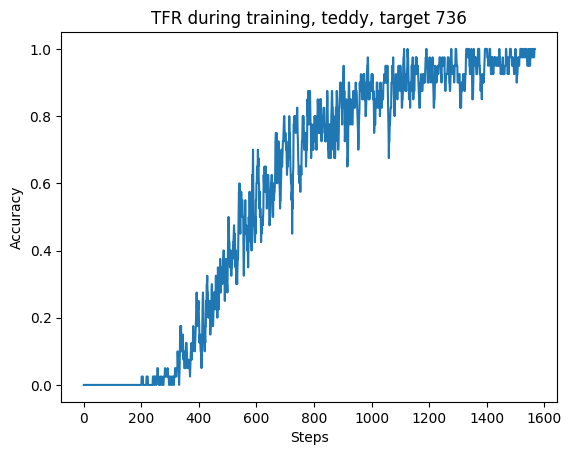

Target label 34
New renders for each step: 8
Step: 0
Loss: 8.204607963562012
Diff: 12.43380069732666
Step: 200
Loss: 0.9775932431221008
Diff: 429.75262451171875
Step: 400
Loss: 0.6264947652816772
Diff: 528.1231689453125
Step: 600
Loss: 0.3340117335319519
Diff: 553.4480590820312
Early Stopping, average loss over past 400 steps is 0.49910301487892866


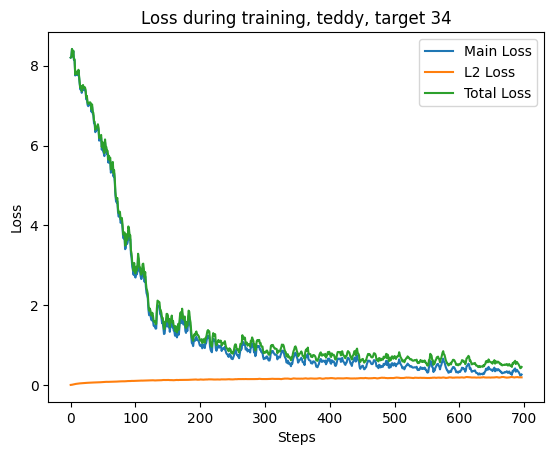

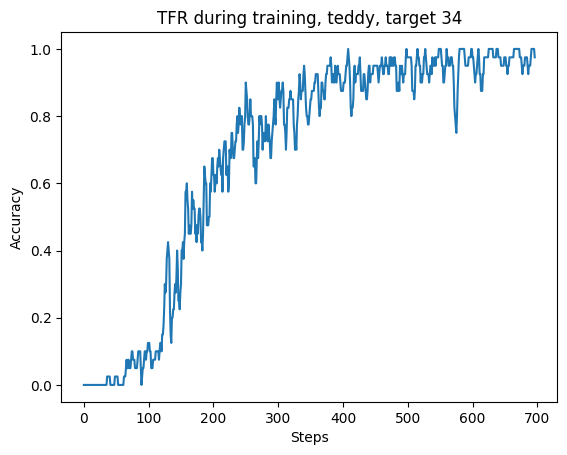

Target label 926
New renders for each step: 8
Step: 0
Loss: 10.54755687713623
Diff: 3.5750885009765625
Step: 200
Loss: 7.120670318603516
Diff: 212.74542236328125
Step: 400
Loss: 6.328649044036865
Diff: 306.7444152832031
Step: 600
Loss: 6.101241111755371
Diff: 223.6904296875
Step: 800
Loss: 5.336983680725098
Diff: -25.961320877075195
Step: 1000
Loss: 5.080715656280518
Diff: -470.44677734375
Step: 1200
Loss: 4.51554012298584
Diff: -970.8234252929688
Step: 1400
Loss: 4.669929504394531
Diff: -1421.6983642578125
Step: 1600
Loss: 4.375473499298096
Diff: -2147.51708984375
Step: 1800
Loss: 4.067887306213379
Diff: -2822.116455078125
Step: 2000
Loss: 4.6092705726623535
Diff: -3700.238037109375
Step: 2200
Loss: 4.0414862632751465
Diff: -4697.70458984375
Step: 2400
Loss: 4.006341457366943
Diff: -5733.96826171875
Step: 2600
Loss: 3.8261306285858154
Diff: -6761.1513671875
Step: 2800
Loss: 3.5454037189483643
Diff: -7865.3662109375
Step: 3000
Loss: 3.061159133911133
Diff: -8986.8857421875
Step: 3200
L

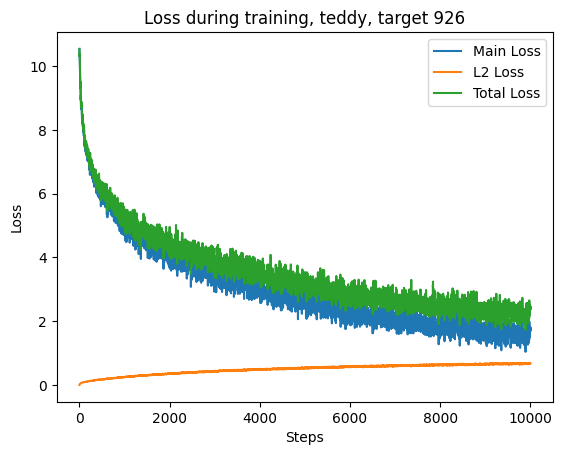

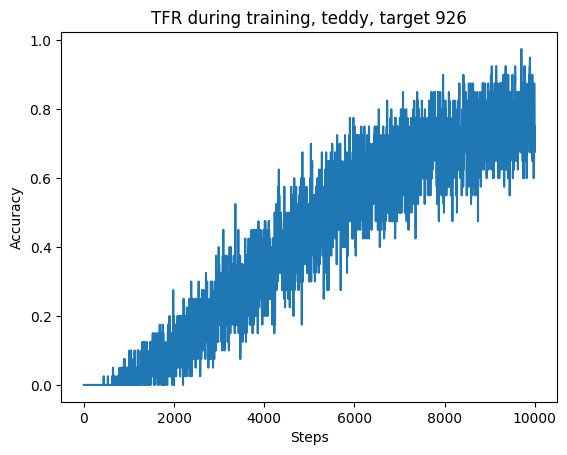

Target label 953
New renders for each step: 8
Step: 0
Loss: 8.991239547729492
Diff: 2.6550614833831787
Step: 200
Loss: 3.4728381633758545
Diff: -349.84576416015625
Step: 400
Loss: 2.0086846351623535
Diff: -744.8322143554688
Step: 600
Loss: 0.743209183216095
Diff: -1181.703369140625
Step: 800
Loss: 0.3953714668750763
Diff: -1641.779541015625
Early Stopping, average loss over past 400 steps is 0.49866282649338245


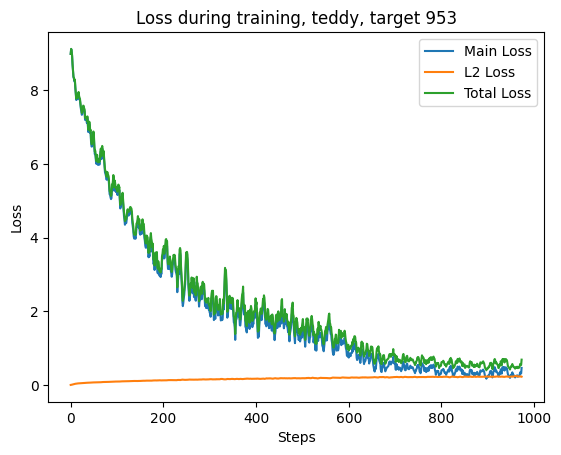

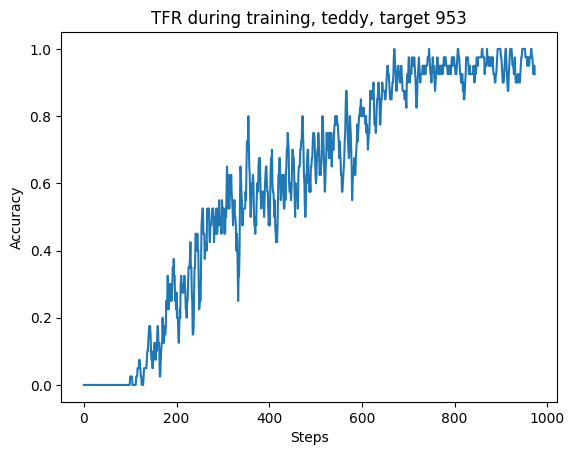

In [7]:
models = load_dataset("./dataset")

for model in models:
    # we only run algorithm on the 4 remaining models
    if model.name in ["purse", "sea_turtle", "taxi", "teddy"]:
        # set the hyper params used by the model to load the texture, 3D model, and target label
        config.OBJ_PATH = model.obj_path
        config.TEXTURE_PATH = model.texture_path
        config.NAME = model.name
        
        print("Creating adversarial examples for model {}".format(model.name))
        for i in range(5):
            config.TARGET_LABEL = get_random_target_label(model.labels)
            print("Target label {}".format(config.TARGET_LABEL))
            
            # run script to create adversarial texture for the given target
            %run main.py